<a href="https://colab.research.google.com/github/alexpharaon/first_ml/blob/main/two_ml_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting the OHLCV data from Alpha Vantage and formatting it properly.**

In [ ]:
#Importing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import requests
import datetime
from google.colab import files
import time
from datetime import datetime
from datetime import timedelta

In [ ]:
files.upload() #upload the file named 'healthcare_tickers.csv'

Saving healthcare_tickers.csv to healthcare_tickers.csv


{'healthcare_tickers.csv': b'\xef\xbb\xbfTicker,Company,Market Cap,Shares Outstanding,Float,IPO Date\r\nABEO,Abeona Therapeutics Inc.,145.40M,91.06M,84.39M,9/19/1980\r\nABIO,"ARCA biopharma, Inc.",45.55M,9.38M,9.28M,08/08/1997\r\nABUS,Arbutus Biopharma Corporation,255.70M,93.43M,63.55M,7/23/2007\r\nACER,Acer Therapeutics Inc.,39.68M,12.50M,12.12M,9/17/2002\r\nACRS,"Aclaris Therapeutics, Inc.",1.19B,50.34M,45.85M,10/07/2015\r\nADMA,"ADMA Biologics, Inc.",203.93M,115.66M,93.91M,10/17/2013\r\nADMS,"Adamas Pharmaceuticals, Inc.",228.17M,35.17M,26.47M,04/10/2014\r\nADVM,"Adverum Biotechnologies, Inc.",346.61M,97.75M,96.74M,7/31/2014\r\nAERI,"Aerie Pharmaceuticals, Inc.",861.53M,46.11M,45.78M,10/25/2013\r\nAEZS,Aeterna Zentaris Inc.,102.58M,95.44M,62.62M,05/10/2000\r\nAGRX,"Agile Therapeutics, Inc.",129.34M,87.63M,67.10M,5/23/2014\r\nAGTC,Applied Genetic Technologies Corporation,173.55M,42.75M,36.27M,3/27/2014\r\nAIKI,AIkido Pharma Inc.,91.78M,88.91M,81.92M,3/18/1980\r\nAKTX,"Akari Therapeut

In [ ]:
########## CREATING THE DATAFRAME ##########

stocks = pd.read_csv('healthcare_tickers.csv')
stocks.head(100)

,Ticker,Company,Market Cap,Shares Outstanding,Float,IPO Date
0,ABEO,Abeona Therapeutics Inc.,145.40M,91.06M,84.39M,9/19/1980
1,ABIO,"ARCA biopharma, Inc.",45.55M,9.38M,9.28M,08/08/1997
2,ABUS,Arbutus Biopharma Corporation,255.70M,93.43M,63.55M,7/23/2007
3,ACER,Acer Therapeutics Inc.,39.68M,12.50M,12.12M,9/17/2002
4,ACRS,"Aclaris Therapeutics, Inc.",1.19B,50.34M,45.85M,10/07/2015
...,...,...,...,...,...,...
95,CTMX,"CytomX Therapeutics, Inc.",549.39M,60.97M,56.52M,10/08/2015
96,CTXR,"Citius Pharmaceuticals, Inc.",293.57M,96.00M,62.65M,10/02/2014
97,CUE,"Cue Biopharma, Inc.",423.48M,30.43M,27.25M,01/02/2018
98,CWBR,"CohBar, Inc.",76.50M,58.55M,43.48M,1/28/2015


In [ ]:
#Testing it works to download data from Alpha Vantage

key_alpha = 'BEWCL5K5CNUC7D12' #Alpha Vantage key
ticker = 'CTXR'

slices = ['year2month12','year2month11', 'year2month10', 'year2month9', 'year2month8', 'year2month7', 'year2month6', 'year2month5', 'year2month4', 'year2month3', 'year2month2', 'year2month1', 
          'year1month12', 'year1month11', 'year1month10', 'year1month9', 'year1month8', 'year1month7', 'year1month6', 'year1month5', 'year1month4', 'year1month3', 'year1month2', 'year1month1']

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol='+ticker+'&interval=30min&slice='+slices[0]+'&apikey='+key_alpha

asd = pd.read_csv(url)


In [ ]:
asd

,time,open,high,low,close,volume
0,2019-08-07 16:00:00,1.0778,1.0778,1.0700,1.0700,3636
1,2019-08-07 15:30:00,1.0730,1.0730,1.0730,1.0730,1000
2,2019-08-07 15:00:00,1.0746,1.0746,1.0700,1.0700,3120
3,2019-08-07 14:00:00,1.0606,1.0700,1.0606,1.0700,1450
4,2019-08-07 13:30:00,1.0616,1.0687,1.0507,1.0628,12075
...,...,...,...,...,...,...
281,2019-07-09 12:00:00,1.0050,1.0200,1.0050,1.0148,3200
282,2019-07-09 11:30:00,1.0050,1.0050,1.0050,1.0050,2200
283,2019-07-09 11:00:00,1.0071,1.0100,1.0071,1.0100,1809
284,2019-07-09 10:30:00,1.0234,1.0234,1.0234,1.0234,1010


In [ ]:
#Automating the download process and combining the dataframes

d = {}

for i in range(len(slices)):
  url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol='+ticker+'&interval=30min&slice='+slices[i]+'&apikey='+key_alpha

  d[i+1] = pd.read_csv(url)
  
  #Wait before loop again
  time.sleep(15) # need to wait a bit due to the Alphavantage API call rates

  print(i+1)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
#Checking that properly downloaded all dataframes

d[23]

,time,open,high,low,close,volume
0,2021-05-28 20:00:00,2.28,2.31,2.2800,2.28,1815
1,2021-05-28 19:30:00,2.30,2.30,2.3000,2.30,2000
2,2021-05-28 19:00:00,2.30,2.30,2.3000,2.30,6205
3,2021-05-28 18:30:00,2.30,2.30,2.3000,2.30,2000
4,2021-05-28 18:00:00,2.30,2.30,2.2999,2.30,4158
...,...,...,...,...,...,...
671,2021-04-29 07:00:00,1.97,1.97,1.9700,1.97,650
672,2021-04-29 06:30:00,1.99,1.99,1.9700,1.97,423
673,2021-04-29 06:00:00,1.94,2.01,1.9400,2.01,4554
674,2021-04-29 05:00:00,1.95,1.95,1.9200,1.93,2341


In [ ]:
#Merging all the dataframes into one

frames = []

for i in range(22):
  print(i+1)
  print(d[i+1])

1
                    time    open    high     low   close  volume
0    2019-08-07 16:00:00  1.0778  1.0778  1.0700  1.0700    3636
1    2019-08-07 15:30:00  1.0730  1.0730  1.0730  1.0730    1000
2    2019-08-07 15:00:00  1.0746  1.0746  1.0700  1.0700    3120
3    2019-08-07 14:00:00  1.0606  1.0700  1.0606  1.0700    1450
4    2019-08-07 13:30:00  1.0616  1.0687  1.0507  1.0628   12075
..                   ...     ...     ...     ...     ...     ...
281  2019-07-09 12:00:00  1.0050  1.0200  1.0050  1.0148    3200
282  2019-07-09 11:30:00  1.0050  1.0050  1.0050  1.0050    2200
283  2019-07-09 11:00:00  1.0071  1.0100  1.0071  1.0100    1809
284  2019-07-09 10:30:00  1.0234  1.0234  1.0234  1.0234    1010
285  2019-07-09 10:00:00  1.0100  1.0200  1.0100  1.0170    1284

[286 rows x 6 columns]
2
                    time    open    high     low   close  volume
0    2019-09-06 16:30:00  1.2300  1.2600  1.2300  1.2600     604
1    2019-09-06 16:00:00  1.2006  1.2500  1.2000  1.2400   160

In [ ]:
#Looking at the first dictionary
d[1].columns

Index(['time', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
d[1].values

array([['2019-08-07 16:00:00', 1.0778, 1.0778, 1.07, 1.07, 3636],
       ['2019-08-07 15:30:00', 1.073, 1.073, 1.073, 1.073, 1000],
       ['2019-08-07 15:00:00', 1.0746, 1.0746, 1.07, 1.07, 3120],
       ...,
       ['2019-07-09 11:00:00', 1.0071, 1.01, 1.0071, 1.01, 1809],
       ['2019-07-09 10:30:00', 1.0234, 1.0234, 1.0234, 1.0234, 1010],
       ['2019-07-09 10:00:00', 1.01, 1.02, 1.01, 1.0170000000000001,
        1284]], dtype=object)

In [ ]:
d[1]

,time,open,high,low,close,volume
0,2019-08-07 16:00:00,1.0778,1.0778,1.0700,1.0700,3636
1,2019-08-07 15:30:00,1.0730,1.0730,1.0730,1.0730,1000
2,2019-08-07 15:00:00,1.0746,1.0746,1.0700,1.0700,3120
3,2019-08-07 14:00:00,1.0606,1.0700,1.0606,1.0700,1450
4,2019-08-07 13:30:00,1.0616,1.0687,1.0507,1.0628,12075
...,...,...,...,...,...,...
281,2019-07-09 12:00:00,1.0050,1.0200,1.0050,1.0148,3200
282,2019-07-09 11:30:00,1.0050,1.0050,1.0050,1.0050,2200
283,2019-07-09 11:00:00,1.0071,1.0100,1.0071,1.0100,1809
284,2019-07-09 10:30:00,1.0234,1.0234,1.0234,1.0234,1010


Need to reverse all the dictionarys such that more recent price data is at the bottom.

In [ ]:
d[1].iloc[::-1]

,time,open,high,low,close,volume
285,2019-07-09 10:00:00,1.0100,1.0200,1.0100,1.0170,1284
284,2019-07-09 10:30:00,1.0234,1.0234,1.0234,1.0234,1010
283,2019-07-09 11:00:00,1.0071,1.0100,1.0071,1.0100,1809
282,2019-07-09 11:30:00,1.0050,1.0050,1.0050,1.0050,2200
281,2019-07-09 12:00:00,1.0050,1.0200,1.0050,1.0148,3200
...,...,...,...,...,...,...
4,2019-08-07 13:30:00,1.0616,1.0687,1.0507,1.0628,12075
3,2019-08-07 14:00:00,1.0606,1.0700,1.0606,1.0700,1450
2,2019-08-07 15:00:00,1.0746,1.0746,1.0700,1.0700,3120
1,2019-08-07 15:30:00,1.0730,1.0730,1.0730,1.0730,1000


In [ ]:
#Flipping all dataframes
for i in range(23):
  d[i+1] = d[i+1].reindex(index=d[i+1].index[::-1])

In [ ]:
#Showing that the flip did indeed work
d[2]

,time,open,high,low,close,volume
254,2019-08-08 10:00:00,1.1200,1.1400,1.0900,1.0900,19730
253,2019-08-08 10:30:00,1.1000,1.1400,1.1000,1.1001,7250
252,2019-08-08 11:00:00,1.1177,1.1400,1.1177,1.1400,520
251,2019-08-08 11:30:00,1.1399,1.1399,1.1000,1.1055,1495
250,2019-08-08 12:00:00,1.1189,1.1189,1.1000,1.1001,2628
...,...,...,...,...,...,...
4,2019-09-06 14:30:00,1.2300,1.2490,1.2000,1.2100,7930
3,2019-09-06 15:00:00,1.2000,1.2300,1.2000,1.2040,7750
2,2019-09-06 15:30:00,1.2244,1.2244,1.2000,1.2000,710
1,2019-09-06 16:00:00,1.2006,1.2500,1.2000,1.2400,16019


In [ ]:
#Merging all the dataframes stored in the dictionary into one big dataframe
data = pd.concat(d.values(), ignore_index=True)

In [ ]:
pd.set_option('display.max_colwidth',1000)
data.head(-10)

,time,open,high,low,close,volume
0,2019-07-09 10:00:00,1.0100,1.0200,1.0100,1.0170,1284
1,2019-07-09 10:30:00,1.0234,1.0234,1.0234,1.0234,1010
2,2019-07-09 11:00:00,1.0071,1.0100,1.0071,1.0100,1809
3,2019-07-09 11:30:00,1.0050,1.0050,1.0050,1.0050,2200
4,2019-07-09 12:00:00,1.0050,1.0200,1.0050,1.0148,3200
...,...,...,...,...,...,...
10248,2021-06-01 11:30:00,2.3200,2.3300,2.3000,2.3100,332294
10249,2021-06-01 11:00:00,2.3699,2.4300,2.3100,2.3200,1697493
10250,2021-06-01 10:30:00,2.3463,2.3700,2.3200,2.3650,599520
10251,2021-06-01 10:00:00,2.2950,2.3500,2.2910,2.3450,691050


In [ ]:
#Converting the dtype of the time column to datetime64[ns[] 
data['time'] = pd.to_datetime(data['time'])

In [ ]:
data.time

0       2019-07-09 10:00:00
1       2019-07-09 10:30:00
2       2019-07-09 11:00:00
3       2019-07-09 11:30:00
4       2019-07-09 12:00:00
                ...        
10258   2021-06-01 06:30:00
10259   2021-06-01 06:00:00
10260   2021-06-01 05:30:00
10261   2021-06-01 05:00:00
10262   2021-06-01 04:30:00
Name: time, Length: 10263, dtype: datetime64[ns]

In [ ]:
#Setting the index to that column
data.set_index('time', inplace=True)

In [ ]:
data.index

DatetimeIndex(['2019-07-09 10:00:00', '2019-07-09 10:30:00',
               '2019-07-09 11:00:00', '2019-07-09 11:30:00',
               '2019-07-09 12:00:00', '2019-07-09 12:30:00',
               '2019-07-09 13:30:00', '2019-07-09 14:00:00',
               '2019-07-09 15:00:00', '2019-07-09 15:30:00',
               ...
               '2021-06-01 09:00:00', '2021-06-01 08:30:00',
               '2021-06-01 08:00:00', '2021-06-01 07:30:00',
               '2021-06-01 07:00:00', '2021-06-01 06:30:00',
               '2021-06-01 06:00:00', '2021-06-01 05:30:00',
               '2021-06-01 05:00:00', '2021-06-01 04:30:00'],
              dtype='datetime64[ns]', name='time', length=10263, freq=None)

Having changed the dtype to a datetime object I can now use boolean indexing as follows. 

In [ ]:
data.loc[data.index.strftime("%H:%M:%S") == "10:00:00"]

,open,high,low,close,volume
time,,,,,
2019-07-09 10:00:00,1.010,1.0200,1.0100,1.0170,1284
2019-07-10 10:00:00,1.010,1.0100,1.0100,1.0100,700
2019-07-11 10:00:00,1.070,1.0800,1.0700,1.0800,20000
2019-07-12 10:00:00,1.070,1.0700,1.0500,1.0500,6025
2019-07-15 10:00:00,1.030,1.0342,1.0300,1.0300,7744
...,...,...,...,...,...
2021-06-07 10:00:00,2.410,2.6283,2.3924,2.5650,2757063
2021-06-04 10:00:00,2.250,2.3192,2.2500,2.3100,305000
2021-06-03 10:00:00,2.240,2.2800,2.1800,2.2317,944699


**I do not want the data from pre- and post-market as I will not be able to trade on that anyways.**

So this data will be removed by looking only at the proper times each day where the market is open (ie. between 9:30am and 4pm). This corresponds to between 10:00am and 16:00 on Alpha Vantage data as - unlike yahoo finance - it shows data for the past 30 minutes rather than the preceeding 30 minutes.

In [ ]:
desired_times = [] # Want to populate a list with the times where the market is open
start_time = datetime(2021,1,1,10,0,0) # data point for the first 30 mins of when the market opens (ie. 10am)

for i in range(13):  
  new_time = start_time + timedelta(minutes=30*(i))
  desired_times.append(new_time.strftime("%H:%M:%S")) # only want to store the hour:minute:second elements. stores everything as strings in a list

desired_times


['10:00:00',
 '10:30:00',
 '11:00:00',
 '11:30:00',
 '12:00:00',
 '12:30:00',
 '13:00:00',
 '13:30:00',
 '14:00:00',
 '14:30:00',
 '15:00:00',
 '15:30:00',
 '16:00:00']

In [ ]:
#Reassigning the dataframe to that which does not include the pre- and post-market data
prepost_data = data # saving data with pre and post-market into this variable
data = data.loc[
          (data.index.strftime("%H:%M:%S") == desired_times[0]) | (data.index.strftime("%H:%M:%S") == desired_times[1]) 
        | (data.index.strftime("%H:%M:%S") == desired_times[2]) | (data.index.strftime("%H:%M:%S") == desired_times[3])
        | (data.index.strftime("%H:%M:%S") == desired_times[4]) | (data.index.strftime("%H:%M:%S") == desired_times[5])
        | (data.index.strftime("%H:%M:%S") == desired_times[6]) | (data.index.strftime("%H:%M:%S") == desired_times[7])
        | (data.index.strftime("%H:%M:%S") == desired_times[8]) | (data.index.strftime("%H:%M:%S") == desired_times[9])
        | (data.index.strftime("%H:%M:%S") == desired_times[10]) | (data.index.strftime("%H:%M:%S") == desired_times[11])
        | (data.index.strftime("%H:%M:%S") == desired_times[12])
        ]

In [ ]:
data.head(50)

,open,high,low,close,volume
time,,,,,
2019-07-09 10:00:00,1.0100,1.0200,1.0100,1.0170,1284
2019-07-09 10:30:00,1.0234,1.0234,1.0234,1.0234,1010
2019-07-09 11:00:00,1.0071,1.0100,1.0071,1.0100,1809
2019-07-09 11:30:00,1.0050,1.0050,1.0050,1.0050,2200
2019-07-09 12:00:00,1.0050,1.0200,1.0050,1.0148,3200
2019-07-09 12:30:00,1.0000,1.0000,1.0000,1.0000,8200
2019-07-09 13:30:00,1.0200,1.0200,1.0200,1.0200,2000
2019-07-09 14:00:00,1.0097,1.0097,1.0050,1.0050,400
2019-07-09 15:00:00,1.0101,1.0200,1.0101,1.0200,1100


In [ ]:
data.to_csv('alpha_data.csv')

I want to gather the trading days and times into two lists. May be useful later.

In [ ]:
trading_days = []
trading_times = desired_times

for string in data.index.values:
  trading_days.append(str(string)[0:10]) # the date element relates to the first 10 characters in the string
  
trading_days = list(dict.fromkeys(trading_days)) #removes duplicate dates

In [ ]:
print(trading_days)

['2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12', '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-29', '2019-07-30', '2019-07-31', '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29', '2019-08-30', '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12', '2019-09-13', '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-30', '2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04', '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-14', '2019-10-15', '2019-10-16', '2019

I can now access a certain date as follows.

In [ ]:
data.loc[(data.index.strftime("%Y-%m-%d") == trading_days[1])]

,open,high,low,close,volume
time,,,,,
2019-07-10 10:00:00,1.0100,1.0100,1.0100,1.0100,700
2019-07-10 10:30:00,1.0200,1.0200,1.0100,1.0150,30086
2019-07-10 11:00:00,1.0100,1.0100,1.0100,1.0100,300
2019-07-10 11:30:00,1.0100,1.0100,1.0000,1.0019,2686
2019-07-10 12:00:00,1.0151,1.0200,1.0150,1.0200,4122
2019-07-10 12:30:00,1.0292,1.0292,1.0249,1.0249,3500
2019-07-10 13:00:00,1.0300,1.0300,1.0230,1.0300,22013
2019-07-10 13:30:00,1.0400,1.0400,1.0300,1.0330,10968
2019-07-10 14:00:00,1.0300,1.0400,1.0300,1.0324,17936


Will plot the data now just to do a visual check that it is complete.

Text(0.5, 1.0, 'CTXR Closing Price over the past two years')

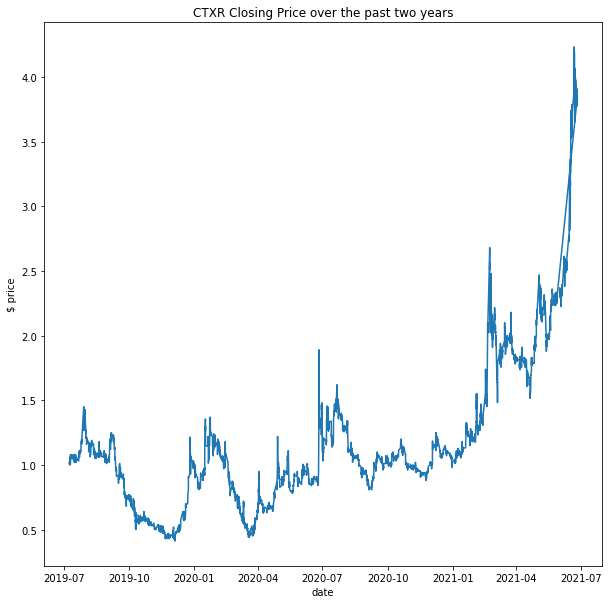

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(data.index, data['close'])
plt.xlabel("date")
plt.ylabel("$ price")
plt.title("CTXR Closing Price over the past two years")

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,6329.0,1.180347,5.892937e-01,0.4104,0.8620,1.0501,1.2850,4.400000e+00
high,6329.0,1.195333,5.977576e-01,0.4108,0.8726,1.0600,1.3000,4.560000e+00
low,6329.0,1.165314,5.810375e-01,0.4000,0.8522,1.0400,1.2663,4.180000e+00
close,6329.0,1.179910,5.898501e-01,0.4108,0.8625,1.0500,1.2850,4.232000e+00
volume,6329.0,252582.188813,1.037261e+06,100.0000,10828.0000,39466.0000,161606.0000,2.831471e+07


In [ ]:
'''
# Make autocorrelation plot here somehow
plt.figure()
plt.plot(data['close'], lag=3)
plt.title('CTXR Stock - Autocorrelation plot with lag = 3')
plt.show()
'''

"\n# Make autocorrelation plot here somehow\nplt.figure()\nplt.plot(data['close'], lag=3)\nplt.title('CTXR Stock - Autocorrelation plot with lag = 3')\nplt.show()\n"

# **Technical indicators features with TaLib**
Will begin with the indicators from TaLib first. Later, will do the ones from TradingView.

Downloading and install TaLib.

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib
import talib

--2021-06-28 12:27:51--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-06-28 12:27:51--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-06-28 12:27:51--  https://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving gigenet.dl.so

In [ ]:
# Lists all possible talib functions
talib.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [ ]:
# Testing it out to confirm talib works
talib.SMA(data['close'],3)

time
2019-07-09 10:00:00         NaN
2019-07-09 10:30:00         NaN
2019-07-09 11:00:00    1.016800
2019-07-09 11:30:00    1.012800
2019-07-09 12:00:00    1.009933
                         ...   
2021-06-01 12:00:00    2.313333
2021-06-01 11:30:00    2.306667
2021-06-01 11:00:00    2.310000
2021-06-01 10:30:00    2.331667
2021-06-01 10:00:00    2.343333
Length: 6329, dtype: float64

In [ ]:
talib.HT_SINE(data['close'])

(time
 2019-07-09 10:00:00         NaN
 2019-07-09 10:30:00         NaN
 2019-07-09 11:00:00         NaN
 2019-07-09 11:30:00         NaN
 2019-07-09 12:00:00         NaN
                          ...   
 2021-06-01 12:00:00   -0.069043
 2021-06-01 11:30:00   -0.273720
 2021-06-01 11:00:00   -0.536140
 2021-06-01 10:30:00   -0.808050
 2021-06-01 10:00:00   -0.911340
 Length: 6329, dtype: float64, time
 2019-07-09 10:00:00         NaN
 2019-07-09 10:30:00         NaN
 2019-07-09 11:00:00         NaN
 2019-07-09 11:30:00         NaN
 2019-07-09 12:00:00         NaN
                          ...   
 2021-06-01 12:00:00   -0.754240
 2021-06-01 11:30:00   -0.873651
 2021-06-01 11:00:00   -0.975998
 2021-06-01 10:30:00   -0.987944
 2021-06-01 10:00:00   -0.935498
 Length: 6329, dtype: float64)

# **Making the 40 other indicators.**

In [ ]:
data[0:300]

,open,high,low,close,volume
time,,,,,
2019-07-09 10:00:00,1.0100,1.0200,1.0100,1.0170,1284
2019-07-09 10:30:00,1.0234,1.0234,1.0234,1.0234,1010
2019-07-09 11:00:00,1.0071,1.0100,1.0071,1.0100,1809
2019-07-09 11:30:00,1.0050,1.0050,1.0050,1.0050,2200
2019-07-09 12:00:00,1.0050,1.0200,1.0050,1.0148,3200
...,...,...,...,...,...
2019-08-12 12:30:00,1.1256,1.1412,1.1200,1.1200,833
2019-08-12 13:00:00,1.1256,1.1256,1.1200,1.1210,4520
2019-08-12 14:00:00,1.1306,1.1306,1.1306,1.1306,200


In [ ]:
# This library allows me to calculate 42 different indicators with one line of code! 
# Any other indicators I may want will have to be coded manually though (using talib)

! pip install --upgrade ta

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=9c08d4a6fca66161d02468aebf636b399b26375194d17e72631e0ddc19711793
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [ ]:
from ta import add_all_ta_features
from ta.utils import dropna

# Add ta features without filling NaN values
data = add_all_ta_features(
    data, open="open", high="high", low="low", close="close", volume="volume", fillna=False)

/usr/local/lib/python3.7/dist-packages/ta/wrapper.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high=df[high], low=df[low], close=df[close], volume=df[volume], fillna=fillna
/usr/local/lib/python3.7/dist-packages/ta/wrapper.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close=df[close], volume=df[volume], fillna=fillna
/usr/local/lib/python3.7/dist-packages/ta/wrapper.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [ ]:
data.head(-10)

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-09 10:00:00,1.0100,1.0200,1.0100,1.0170,1284,5.136000e+02,1284,NaN,NaN,NaN,NaN,NaN,4540.784697,1000.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.025667,1.005667,NaN,0.566667,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01500,1.185468,1.194964,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.807017,NaN,0.000000
2019-07-09 10:30:00,1.0234,1.0234,1.0234,1.0234,1010,5.136000e+02,2294,NaN,NaN,NaN,0.000000,NaN,-170.926155,1006.293019,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.024533,1.014533,NaN,0.886667,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01670,1.185468,1.194964,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629302,0.627330,0.629302
2019-07-09 11:00:00,1.0071,1.0100,1.0071,1.0100,1809,2.322600e+03,485,NaN,NaN,NaN,-2.380597,NaN,-17.330391,1006.293019,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.020333,1.011733,NaN,-0.201550,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01525,1.185468,1.194964,NaN,NaN,NaN,NaN,1.020000,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.309361,-1.318009,-0.688299
2019-07-09 11:30:00,1.0050,1.0050,1.0050,1.0050,2200,2.322600e+03,-1715,NaN,NaN,NaN,-0.000000,NaN,-34.577429,1006.293019,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.016500,1.010050,NaN,-0.782946,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01420,1.185468,1.194964,NaN,NaN,NaN,NaN,1.023400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.495050,-0.496279,-1.179941
2019-07-09 12:00:00,1.0050,1.0200,1.0050,1.0148,3200,3.303933e+03,1485,NaN,NaN,NaN,3.515625,NaN,20.312891,1006.293019,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.018853,1.007693,NaN,0.636798,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01420,1.185468,1.194964,NaN,NaN,NaN,NaN,1.022664,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975124,0.970401,-0.216323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-02 10:30:00,2.3470,2.3500,2.3000,2.3150,448532,-2.090603e+07,110164827,0.207885,505.750791,38.777936,0.167212,-0.003694,383.866186,435.220114,2.285152,0.038467,2.288025,2.346037,2.230013,5.070959,0.732493,0.0,0.0,2.3024

In [ ]:
# Check how many rows and cells have nan values

print('There are ' + str(data.isnull().values.ravel().sum()) + ' empty cells.')
print('There are ' + str(data.shape[0] - data.dropna().shape[0]) + ' rows with nan values.')


There are 7568 empty cells.
There are 6329 rows with nan values.


There are lots of nan values. 1.3% of all data is nan. Let's see how the nan values are distributed.

In [ ]:
!pip install missingno

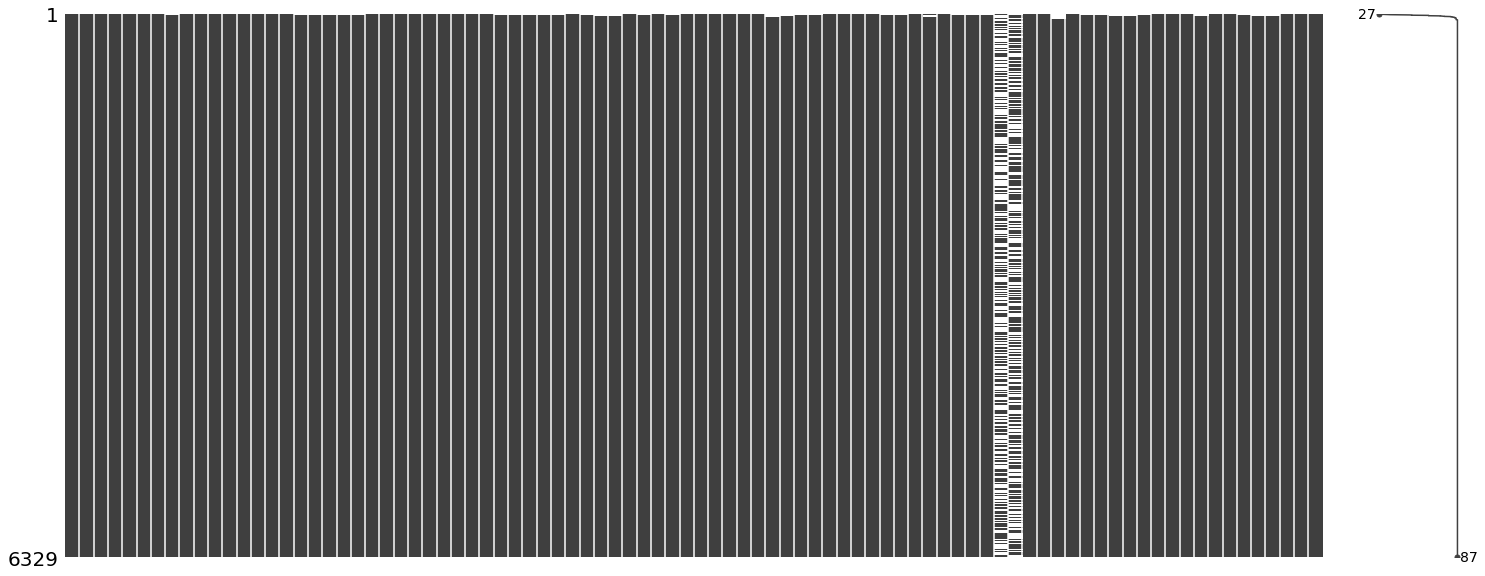

In [ ]:
import missingno as msno
msno.matrix(data)

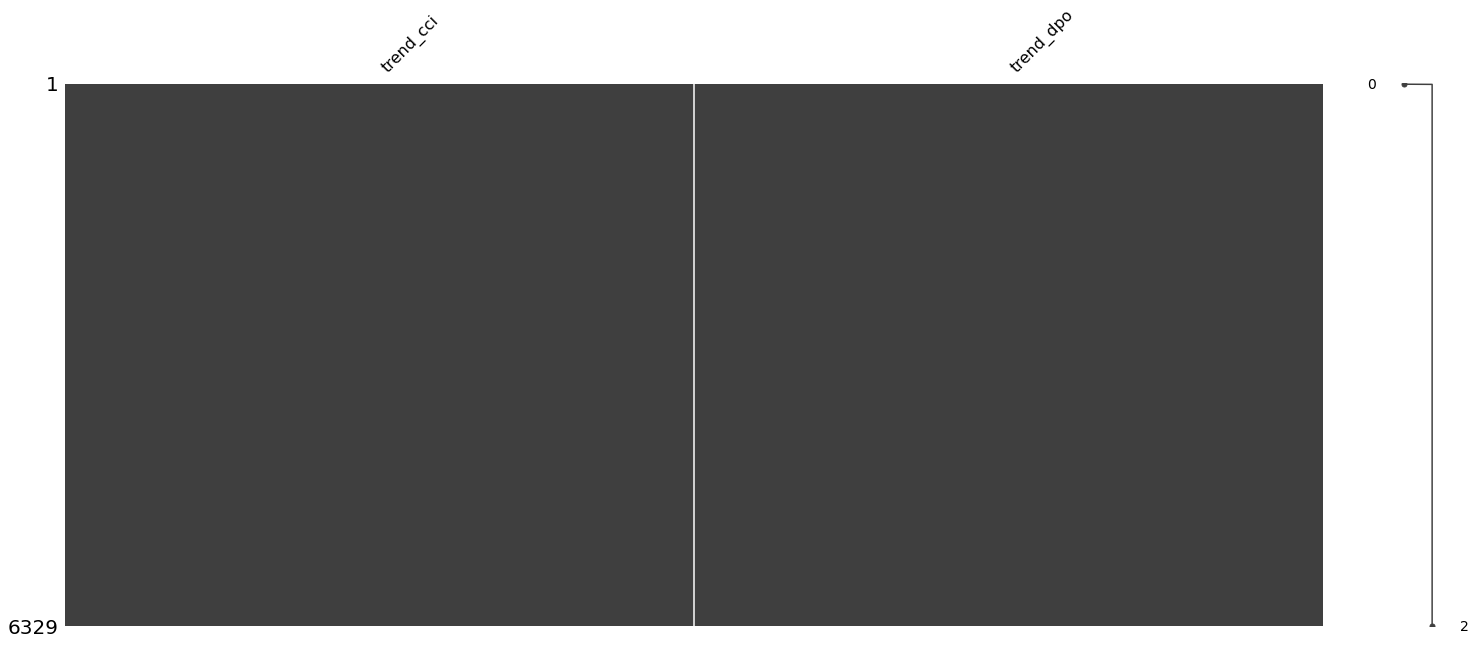

In [ ]:
msno.matrix(data[data.columns[-37:-35]])

In [ ]:
data.isnull().sum()

open                    0
high                    0
low                     0
close                   0
volume                  0
                       ..
momentum_ppo_signal    33
momentum_ppo_hist      33
others_dr               0
others_dlr              1
others_cr               0
Length: 88, dtype: int64

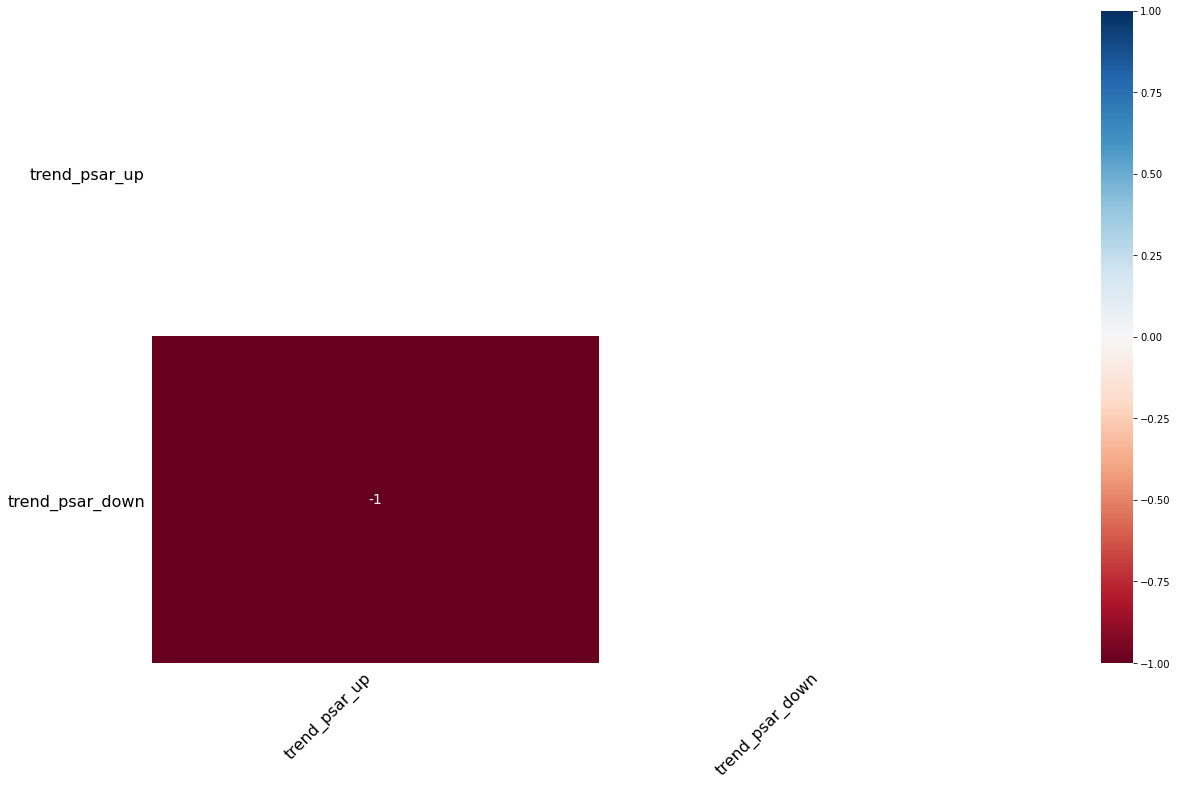

In [ ]:
msno.heatmap(data[data.columns[-23:-21]])

So trend_psar_down and trend_psar_up have nan values in the opposite rows.

Will add columns with the percentage changes and with log returns.

In [ ]:
# Iterating through ohlcv list to create percentage change and log returns column for each thing in the list

ohlcv = ['open', 'high', 'low', 'close', 'volume']

for column in ohlcv:
  data["pct_change_"+column] = data[column].pct_change()
  data["log_ret_"+column] = np.log(data[column]) - np.log(data[column].shift(1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
data.head()

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,pct_change_open,log_ret_open,pct_change_high,log_ret_high,pct_change_low,log_ret_low,pct_change_close,log_ret_close,pct_change_volume,log_ret_volume
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-09 10:00:00,1.0100,1.0200,1.0100,1.0170,1284,513.600000,1284,NaN,NaN,NaN,NaN,NaN,4540.784697,1000.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.025667,1.005667,NaN,0.566667,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.01500,1.185468,1.194964,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.807017,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-09 10:30:00,1.0234,1.0234,1.0234,1.0234,1010,513.600000,2294,NaN,NaN,NaN,0.000000,NaN,-170.926155,1006.293019,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.024533,1.014533,NaN,0.886667,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.01670,1.185468,1.194964,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629302,0.627330,0.629302,0.013267,0.013180,0.003333,0.003328,0.013267,0.013180,0.006293,0.006273,-0.213396,-0.240030
2019-07-09 11:00:00,1.0071,1.0100,1.0071,1.0100,1809,2322.600000,485,NaN,NaN,NaN,-2.380597,NaN,-17.330391,1006.293019,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.020333,1.011733,NaN,-0.201550,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.01525,1.185468,1.194964,NaN,NaN,NaN,NaN,1.020000,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.309361,-1.318009,-0.688299,-0.015927,-0.016056,-0.013094,-0.013180,-0.015927,-0.016056,-0.013094,-0.013180,0.791089,0.582824
2019-07-09 11:30:00,1.0050,1.0050,1.0050,1.0050,2200,2322.600000,-1715,NaN,NaN,NaN,-0.000000,NaN,-34.577429,1006.293019,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.016500,1.010050,NaN,-0.782946,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.01420,1.185468,1.194964,NaN,NaN,NaN,NaN,1.023400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.495050,-0.496279,-1.179941,-0.002085,-0.002087,-0.004950,-0.004963,-0.002085,-0.002087,-0.004950,-0.004963,0.216142,0.195683
2019-07-09 12:00:00,1.0050,1.0200,1.0050,1.0148,3200,3303.933333,1485,NaN,NaN,NaN,3.515625,NaN,20.312891,1006.293019,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.018853,1.007693,NaN,0.636798,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.01420,1.185468,1.194964,NaN,NaN,NaN,NaN,1.022664,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975124,0.970401,-0.216323,0.000000,0.000000,0.014925,0.014815,0.000000,0.000000,0.009751,0.009704,0.454545,0.374693


# **Making other indicators**

FFT to find most important frequency; ie. how periodic the data is (due to seasonality)

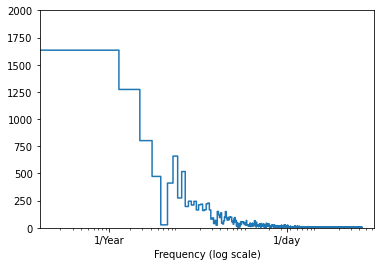

In [ ]:
import tensorflow as tf

fft = tf.signal.rfft(data['close'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(data['close'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 2000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

# **Making the target columns**

Will make the following targets:


*   `target_1` = WMA(8,-2)
*   `target_2` = WMA(12,-3)
*   `target_3` = WMA(16,-4)
*   `target_4` = WMA(50,-14)

All targets take the form WMA(m,n) where m is the loockback period and n is the shift-back period to overcome the fact that moving averages and backward-looking. Although at first thought this may seem like "cheating" keep in mind that the purpose of this is to find a collection of weights and biases that can reproduce the shifted WMA in real-time. Thus, when actually trading, the shifted WMA will never be used.



In [ ]:
# This is an example of how to make and shift WMA

talib.WMA(data['close'], 8).shift(-2)[0:8]

time
2019-07-09 10:00:00         NaN
2019-07-09 10:30:00         NaN
2019-07-09 11:00:00         NaN
2019-07-09 11:30:00         NaN
2019-07-09 12:00:00         NaN
2019-07-09 12:30:00    1.010217
2019-07-09 13:30:00    1.012017
2019-07-09 14:00:00    1.012067
dtype: float64

In [ ]:
data['target_1'] = talib.WMA(data['close'], 8).shift(-2)
data['target_2'] = talib.WMA(data['close'], 12).shift(-3)
data['target_3'] = talib.WMA(data['close'], 16).shift(-4)
data['target_4'] = talib.WMA(data['close'], 50).shift(-14)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# Confirming that the number of NaN values in the beginning is right for all the targets

data.head(10)

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,pct_change_open,log_ret_open,pct_change_high,log_ret_high,pct_change_low,log_ret_low,pct_change_close,log_ret_close,pct_change_volume,log_ret_volume,target_1,target_2,target_3,target_4
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-09 10:00:00,1.0100,1.0200,1.0100,1.0170,1284,513.600000,1284,NaN,NaN,NaN,NaN,NaN,4540.784697,1000.000000,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.025667,1.005667,NaN,0.566667,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.807017,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-09 10:30:00,1.0234,1.0234,1.0234,1.0234,1010,513.600000,2294,NaN,NaN,NaN,0.000000,NaN,-170.926155,1006.293019,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.024533,1.014533,NaN,0.886667,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629302,0.627330,0.629302,0.013267,0.013180,0.003333,0.003328,0.013267,0.013180,0.006293,0.006273,-0.213396,-0.240030,NaN,NaN,NaN,NaN
2019-07-09 11:00:00,1.0071,1.0100,1.0071,1.0100,1809,2322.600000,485,NaN,NaN,NaN,-2.380597,NaN,-17.330391,1006.293019,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.020333,1.011733,NaN,-0.201550,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.020000,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.309361,-1.318009,-0.688299,-0.015927,-0.016056,-0.013094,-0.013180,-0.015927,-0.016056,-0.013094,-0.013180,0.791089,0.582824,NaN,NaN,NaN,NaN
2019-07-09 11:30:00,1.0050,1.0050,1.0050,1.0050,2200,2322.600000,-1715,NaN,NaN,NaN,-0.000000,NaN,-34.577429,1006.293019,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.016500,1.010050,NaN,-0.782946,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.023400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.495050,-0.496279,-1.179941,-0.002085,-0.002087,-0.004950,-0.004963,-0.002085,-0.002087,-0.004950,-0.004963,0.216142,0.195683,NaN,NaN,NaN,NaN
2019-07-09 12:00:00,1.0050,1.0200,1.0050,1.0148,3200,3303.933333,1485,NaN,NaN,NaN,3.515625,NaN,20.312891,1006.293019,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.018853,1.007693,NaN,0.636798,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.022664,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975124,0.970401,-0.216323,0.000000,0.000000,0.014925,0.014815,0.000000,0.000000,0.009751,0.009704,0.454545,0.374693,NaN,NaN,NaN,NaN
2019-07-09 12:30:00,1.0000,1.0000,1.0000,1.0000,8200,3303.933333,-6715,NaN,NaN,NaN,-0.000000,NaN,-88.386087,1006.293019,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.015711,1.006411,NaN,-0.689367,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.021957,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.458415,-1.469155,-1.671583,-0.004975,-0.004988,-0.019608,-0.019803,-0.004975,-0.004988,-0.014584,-0.014692,1.562500,0.94098

Since `target_4` has 35 NaN values, will remove the first 35 rows as follows.

In [ ]:
data = data[35:]

Since `target_4` has been shifted up 14 rows, will remove the last 14 rows as follows.

In [ ]:
data = data[:-14]

In [ ]:
data.describe()

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,pct_change_open,log_ret_open,pct_change_high,log_ret_high,pct_change_low,log_ret_low,pct_change_close,log_ret_close,pct_change_volume,log_ret_volume,target_1,target_2,target_3,target_4
count,6280.000000,6280.000000,6280.000000,6280.000000,6.280000e+03,6.280000e+03,6.280000e+03,6280.000000,6.280000e+03,6280.000000,6280.000000,6280.000000,6.280000e+03,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,...,6280.000000,6280.000000,6280.000000,2819.000000,3461.000000,6280.000000,6280.000000,6.244000e+03,6280.000000,6280.000000,6280.000000,6280.000000,6278.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000
mean,1.178578,1.193599,1.163478,1.178124,2.535681e+05,-1.321450e+07,3.367222e+07,-0.058801,6.195423e+03,49.385892,0.069250,0.069395,9.504115e+03,782.913916,1.182513,0.032735,1.176260,1.245955,1.106565,11.381220,0.485070,0.058439,0.047452,1.177512,1.207616,1.147408,5.165637,0.501078,0.149522,0.160191,1.104027,1.263084,1.183556,13.295109,0.450189,4.372697,0.001421,0.001441,-0.000020,1.177039,...,45.830573,50.320382,-4.489809,1.144332,1.224010,0.034236,0.034076,4.991444e+01,49.756068,0.477938,0.477794,0.477665,-0.341678,48.023334,45.359443,45.353631,-54.640557,0.002853,1.182986,0.408580,-4.630950,-4.628946,-0.002004,0.043315,0.012418,15.843061,0.000440,0.000126,0.000487,0.000127,0.000378,0.000123,0.000433,0.000124,2.704619,0.000972,1.178061,1.177997,1.177933,1.177688
std,0.588982,0.597456,0.580667,0.589524,1.040942e+06,1.129088e+07,3.669928e+07,0.229755,8.698375e+04,20.082673,5.712421,1.213033,3.438051e+05,124.782502,0.590374,0.027165,0.584868,0.638883,0.543105,10.091321,0.325494,0.234591,0.212621,0.586782,0.603586,0.570624,3.140116,0.723205,0.356631,0.366812,0.538495,0.642227,0.586227,9.843011,0.271704,3.358517,0.036446,0.034349,0.010893,0.586722,...,33.488959,34.246652,58.589088,0.575897,0.599559,0.181848,0.181440,4.304140e+01,11.191504,0.344956,0.303232,0.289970,19.273881,11.205663,27.268685,24.766528,27.268685,0.091827,0.590275,7.622340,21.538146,17.250565,11.535040,2.591277,2.445540,57.966926,0.025716,0.024774,0.028204,0.026293,0.022990,0.022448,0.025913,0.024455,47.377132,1.274796,0.588405,0.587862,0.587324,0.583177
min,0.410400,0.410800,0.400000,0.410800,1.000000e+02,-4.739617e+07,-7.035590e+05,-0.874040,-2.587437e+05,2.761733,-196.399345,-14.001310,-3.077407e+06,414.214483,0.427486,0.005636,0.431700,0.446126,0.402729,1.757464,-0.463432,0.000000,0.000000,0.427694,0.436678,0.415110,0.276351,-3.303949,0.000000,0.000000,0.400000,0.450000,0.425000,1.803939,0.000000,0.129649,-0.

# **Data processing**

Processing the data before feeding it to the models. This includes feature scaling amongst other things. See: https://en.wikipedia.org/wiki/Data_processing

To preprocess the data will standardize it by subtracting the *testing* mean and dividing by the *testing* standard deviation. 

In [ ]:
keep_columns = [col for col in data.columns if 'target' not in col]
targets = [col for col in data.columns if 'target' in col]

print(keep_columns)
print(targets)

['open', 'high', 'low', 'close', 'volume', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap', 'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp', 'volatility_bbhi', 'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp', 'volatility_kchi', 'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv', 'trend_ichimoku_base', 'trend_ichimoku_a', 'trend_ichimok

In [ ]:
X = data[keep_columns].values
Y = data['target_1'].values

**Will split the data into: 70% training, 15% validation, and 15% test.** 

In [ ]:
times = sorted(data.index.values) # list of all the numpy datetimes

last_15pct = times[-int(0.15 * len(times))] # gives a numpy date
last_30pct = times[-int(0.30 * len(times))]

In [ ]:
# Creating the training, validation, and test sets of X and Y
# Must now preprocess by standardising based off training_set and then 

training_set_raw = data[data.index < last_30pct]
validation_set_raw = data[data.index >= last_30pct]
validation_set_raw = validation_set_raw[validation_set_raw.index < last_15pct]
test_set_raw = data[data.index >= last_15pct]

**Will now standardize all values based off the mean and standard deviation in the test set.**

In [ ]:
def preprocess(training_set, validation_set, test_set, target_name: string): # Takes the already split sets as inputs

  training = pd.DataFrame()
  validation = pd.DataFrame()
  test = pd.DataFrame()

  for col in training_set.columns: # Iterating through training set columns
    
    # Calculating the mean and standard deviation for that column in training set
    mean = training_set[col].mean()
    std = training_set[col].std()

    # Standardizes the value across all sets
    training[col] = (training_set[col] - mean) / std 
    validation[col] = (validation_set[col] - mean) / std 
    test[col] = (test_set[col] - mean) / std 
  
  # Replace any nan values with the value -100; these values will later be masked
  training.fillna(-100, inplace=True)
  validation.fillna(-100, inplace=True)
  test.fillna(-100, inplace=True)

  return pd.concat([training[keep_columns], training[target_name]], axis=1), pd.concat([validation[keep_columns], validation[target_name]], axis=1), pd.concat([test[keep_columns], test[target_name]], axis=1),

In [ ]:
# Can now use the function to obtain the standardized values

training_set, validation_set, test_set = preprocess(training_set_raw, validation_set_raw, test_set_raw, 'target_1')

In [ ]:
training_set

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,pct_change_open,log_ret_open,pct_change_high,log_ret_high,pct_change_low,log_ret_low,pct_change_close,log_ret_close,pct_change_volume,log_ret_volume,target_1
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-11 15:30:00,0.613919,0.579719,0.649086,0.597742,-0.162383,1.091209,-0.845911,1.215326,-0.047682,-0.035370,0.222185,0.007778,-0.019384,1.754701,0.606581,-0.824019,0.602374,0.486555,0.707584,-0.524013,0.088035,-0.24501,-0.231687,0.622838,0.552133,0.693875,-1.049044,-0.496409,-0.413496,-0.451672,0.702784,0.362035,0.529671,-0.820708,0.810205,-0.904375,0.473089,0.640663,-0.391276,0.632768,...,0.433595,-100.000000,0.318568,0.337019,-1.033701,0.800047,-100.0,0.405188,-0.187934,-0.187934,-100.000000,0.439031,-1.260449,-1.335986,-1.200880,-100.000000,-0.422411,-0.375778,0.113454,-0.375778,0.445016,0.592204,0.037118,-0.753305,0.053124,-1.478427,-0.061221,-0.051190,0.597742,0.118949,0.133750,0.267124,0.296106,-0.068396,-0.056924,-0.061221,-0.051190,-0.038687,0.566499,0.601515
2019-07-11 16:00:00,0.634011,0.579719,0.664555,0.613026,-0.162655,1.090903,-0.845783,1.257349,-0.047655,-0.267240,0.067743,-0.000458,-0.019355,1.782167,0.603320,-0.838764,0.610283,0.478820,0.732865,-0.603344,0.184144,-0.24501,-0.231687,0.617671,0.547919,0.687737,-1.036740,-0.034683,-0.413496,-0.451672,0.702784,0.362035,0.529671,-0.821690,1.057256,-0.888386,0.445580,0.607793,-0.381311,0.627300,...,0.433595,-100.000000,0.318568,0.217076,-1.150795,0.800047,-100.0,0.403155,-0.187934,-0.187934,-100.000000,0.580852,-0.937301,-1.297065,-1.309710,-100.000000,0.152189,0.090768,-0.181493,0.090768,0.420668,0.592313,-0.234167,-0.876091,-0.176862,-1.365528,0.125887,0.144177,0.613026,0.168960,0.184440,-0.012124,0.001306,0.150884,0.161057,0.125887,0.144177,-0.061987,-0.043121,0.590833
2019-07-12 10:00:00,0.634011,0.579719,0.608378,0.557520,-0.154453,1.090025,-0.846151,0.572652,-0.047860,-0.187740,-0.350311,0.061778,-0.019578,1.782167,0.603441,-0.788785,0.614349,0.470797,0.750444,-0.665024,-0.652472,-0.24501,-0.231687,0.613625,0.543969,0.683608,-1.036243,-1.168329,-0.413496,2.213494,0.732643,0.362035,0.543722,-0.887781,-0.112985,-0.859486,0.367106,0.564691,-0.500706,0.617176,...,0.433595,-100.000000,0.318568,0.097133,-1.267888,0.800047,-100.0,0.401163,-0.187934,-0.187934,-100.000000,-0.008319,-1.398277,-1.382347,-1.403223,1.116309,-0.655694,-1.603528,-0.700379,-1.603528,0.372969,0.591436,-0.409777,-0.658903,-0.306423,-0.769867,-0.505854,-0.519324,0.557520,-0.011221,0.001504,-0.012124,0.001306,-0.589478,-0.579244,-0.505854,-0.519324,-0.027130,0.744689,0.590250
2019-07-12 10:30:00,0.553641,0.540015,0.608378,0.557520,-0.164199,1.089827,-0.846068,0.674537,-0.047828,-1.242278,-0.553122,-0.150439,-0.019601,1.782167,0.589139,-0.807054,0.617805,0.463075,0.766409,-0.722043,-0.796297,-0.24501,-0.231687,0.604209,0.534778,0.674002,-1.035084,-0.962265,-0.413496,2.213494,0.732643,0.362035,0.543722,-0.888156,-0.112985,-0.811715,0.301540,0.516169,-0.563964,0.607051,...,0.4335

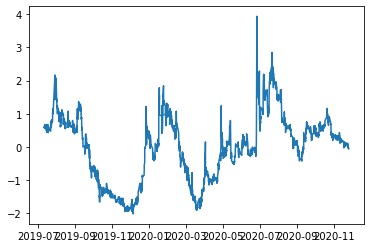

In [ ]:
# Seeing how the plot looks like after standardization

plt.plot(training_set.close)

Will use a masking layer to mask the NaN data (which has been converted to values of -100).

In [ ]:
from collections import deque
import random # used to shuffle the data

sequence_length = 60 # length of the sequence

def get_sequences(X_and_Y_data: pd.DataFrame(), shuffle: True):

  sequential_data = []
  prev_days = deque(maxlen=sequence_length)

  for i in X_and_Y_data.values: # goes through row by row array
    prev_days.append([n for n in i[:-1]]) # makes sequence for all features excluding last column (as that is the target)
    if len(prev_days) == sequence_length:
      sequential_data.append([np.array(prev_days), i[-1]])

  # Shuffle all the data sequences
  if shuffle: 
    random.shuffle(sequential_data)
  
  # Creating lists to hold the X and Y data
  X_data = []
  Y_data = []

  # Will also seperate the sequential_data into X and Y sets
  for X_sequence, Y_target in sequential_data:
    X_data.append(X_sequence)
    Y_data.append(Y_target)
  
  return sequential_data, np.array(X_data), np.array(Y_data)

In [ ]:
# Get the sequential data for the training set

sequential_training_data, sequential_training_X, sequential_training_Y = get_sequences(training_set, shuffle = True)

In [ ]:
# Look at the sequential data for the training set
# Bear in mind it is not the first row in the training_set dataframe because the sequences are shuffled in the function get_sequences

print(sequential_training_data[0])

[array([[ 2.32179882e+00,  2.36640611e+00,  2.35884520e+00, ...,
         8.04524266e-01, -4.31029653e-02,  4.84497174e-01],
       [ 2.40216964e+00,  2.32670195e+00,  2.19601101e+00, ...,
        -1.34157408e+00, -6.51650353e-02, -1.89182784e-01],
       [ 2.24142799e+00,  2.28699779e+00,  2.27742810e+00, ...,
         5.44101701e-01, -6.90823438e-02, -4.24220116e-01],
       ...,
       [ 1.47951257e+00,  1.45321045e+00,  1.54467424e+00, ...,
         1.45230738e-03, -6.50164548e-02, -1.81638519e-01],
       [ 1.49799786e+00,  1.49291461e+00,  1.50396570e+00, ...,
         1.56342270e-01, -5.87849334e-02,  7.87022457e-02],
       [ 1.55787413e+00,  1.53261877e+00,  1.54467424e+00, ...,
         1.86529740e-01, -7.07688859e-02, -5.55768122e-01]]), 1.513335569904319]


# **Making the Machine Learning model**

## Model #1

Must first determine all the constants.

In [ ]:
import time

EPOCHS = 25
BATCH_SIZE = 64

# Gives a unique model name
NAME = f"{sequence_length}-SEQ_LENGTH-{int(time.time())}"

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, LSTM, BatchNormalization, Dense, Masking
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

NEED TO IMPLEMENT A MASKING LAYER (FOR ALL THE -100s)

In [ ]:
# Define the model

model = Sequential([
                    Masking(mask_value=-100, input_shape=(sequential_training_X.shape[1:])),

                    LSTM(128, input_shape=(sequential_training_X.shape[1:]), return_sequences=True),
                    Dropout(0.2),
                    BatchNormalization(),

                    LSTM(128, input_shape=(sequential_training_X.shape[1:]), return_sequences=True),
                    Dropout(0.2),
                    BatchNormalization(),

                    LSTM(128, input_shape=(sequential_training_X.shape[1:])),
                    Dropout(0.2),
                    BatchNormalization(),

                    Dense(32, activation='relu'),
                    Dropout(0.2),

                    Dense(1)
])

In [ ]:
# Define the Adam optimizer with custom parameters

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

model.compile(loss='mean_squared_error', 
              optimizer=opt, 
              metrics=['MeanSquaredError', 'MeanAbsoluteError'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 60, 98)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 60, 128)           116224    
_________________________________________________________________
dropout (Dropout)            (None, 60, 128)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 128)           512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 128)           5

In [ ]:
# Getting the validation data need before training
# Do not want to shuffle the validation nor testing data

sequential_validation_data, sequential_validation_X, sequential_validation_Y = get_sequences(validation_set, False)

In [ ]:
sequential_validation_X

array([[[-4.47201205e-02, -9.08843073e-02, -1.12570726e-01, ...,
         -1.09390412e+00, -5.66342411e-02,  1.50137639e-01],
        [-9.45500319e-02, -1.34955924e-01, -7.51188624e-02, ...,
          2.58988695e-01, -6.65033283e-02, -2.61028281e-01],
        [-9.01336550e-02, -1.34955924e-01, -7.10480076e-02, ...,
          1.76708123e-01, -5.17004096e-02,  2.91000406e-01],
        ...,
        [ 3.12528196e-01,  3.01392787e-01,  2.54620373e-01, ...,
         -1.61020525e+00, -7.22094084e-02, -6.91485578e-01],
        [ 3.11724488e-01,  2.62883723e-01,  3.23417818e-01, ...,
          8.23497838e-01, -7.49299698e-02, -1.05221906e+00],
        [ 3.33022756e-01,  3.00991775e-01,  2.83116356e-01, ...,
         -8.16522788e-01, -2.18379790e-02,  8.13361139e-01]],

       [[-9.45500319e-02, -1.34955924e-01, -7.51188624e-02, ...,
          2.58988695e-01, -6.65033283e-02, -2.61028281e-01],
        [-9.01336550e-02, -1.34955924e-01, -7.10480076e-02, ...,
          1.76708123e-01, -5.17004096e

In [ ]:
sequential_validation_Y

array([0.30047084, 0.29979738, 0.30450976, 0.31185894, 0.33265025,
       0.35069266, 0.3667155 , 0.36928498, 0.37858676, 0.37623046,
       0.38225585, 0.39374561, 0.39986077, 0.41866628, 0.43969345,
       0.45342731, 0.49063439, 0.52224246, 0.53818675, 0.61696569,
       0.73760821, 0.78082947, 0.84456175, 0.89125014, 0.9253716 ,
       0.94846333, 0.96134443, 0.96300506, 0.96186057, 0.95566687,
       0.9392401 , 0.94235939, 0.95274955, 0.95507219, 0.94394148,
       0.94643242, 0.95055034, 0.95476923, 0.95786608, 0.96781864,
       0.96758301, 0.95938085, 0.94906923, 0.94183203, 0.93642376,
       0.93380939, 0.93314738, 0.93824148, 0.96600093, 1.03315545,
       1.11726411, 1.12688006, 1.15710801, 1.14332927, 1.11436923,
       1.08034876, 1.01195998, 0.96806549, 0.94975368, 0.94522061,
       0.94185447, 0.97205998, 0.97290152, 0.96664049, 0.97504463,
       0.99663282, 1.00891923, 1.01890545, 1.04037022, 1.03447947,
       1.02135152, 1.01680723, 1.02966589, 1.02247356, 1.05735

Before running, must also set up a `ModelCheckpoint` that saves the best model.

In [ ]:
# Creating the filepath for the name that model will be saved as
# Creating the ModelCheckpoint that saves the model with the lowe

filepath = 'LSTM-{epoch:02d}-{val_mean_squared_error:.3f}' # unique file name that will include the epoch and validation accuracy
checkpoint = ModelCheckpoint('models/{}.model'.format(filepath, monitor='val_mean_squared_error', verbose=1, save_best_only=True, mode='min'))

In [ ]:
# Create a dummy feature dimension

padded_x_train = np.expand_dims(sequential_training_X, -1)
padded_x_val = np.expand_dims(sequential_validation_X, -1)

In [ ]:
# Create a masking layer

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
tf_x_val = tf.convert_to_tensor(padded_x_val, dtype='float32')

In [ ]:
# Training the model

history = model.fit(tf_x_train, sequential_training_Y, 
          validation_data=(sequential_validation_X, sequential_validation_Y), 
          epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1,
          callbacks=[checkpoint])
# sequential_validation_X

Epoch 1/25
68/68 [==============================] - 44s 492ms/step - loss: 0.7616 - mean_squared_error: 0.7616 - mean_absolute_error: 0.6497 - val_loss: 4.8140 - val_mean_squared_error: 4.8140 - val_mean_absolute_error: 1.6959


INFO:tensorflow:Assets written to: models/LSTM-01-4.814.model/assets


INFO:tensorflow:Assets written to: models/LSTM-01-4.814.model/assets


Epoch 2/25
68/68 [==============================] - 30s 439ms/step - loss: 0.2887 - mean_squared_error: 0.2887 - mean_absolute_error: 0.4193 - val_loss: 4.2699 - val_mean_squared_error: 4.2699 - val_mean_absolute_error: 1.6194


INFO:tensorflow:Assets written to: models/LSTM-02-4.270.model/assets


INFO:tensorflow:Assets written to: models/LSTM-02-4.270.model/assets


Epoch 3/25
68/68 [==============================] - 30s 447ms/step - loss: 0.2092 - mean_squared_error: 0.2092 - mean_absolute_error: 0.3606 - val_loss: 3.1342 - val_mean_squared_error: 3.1342 - val_mean_absolute_error: 1.3736


INFO:tensorflow:Assets written to: models/LSTM-03-3.134.model/assets


INFO:tensorflow:Assets written to: models/LSTM-03-3.134.model/assets


Epoch 4/25
68/68 [==============================] - 30s 444ms/step - loss: 0.1703 - mean_squared_error: 0.1703 - mean_absolute_error: 0.3207 - val_loss: 2.1347 - val_mean_squared_error: 2.1347 - val_mean_absolute_error: 1.0960


INFO:tensorflow:Assets written to: models/LSTM-04-2.135.model/assets


INFO:tensorflow:Assets written to: models/LSTM-04-2.135.model/assets


Epoch 5/25
68/68 [==============================] - 30s 442ms/step - loss: 0.1371 - mean_squared_error: 0.1371 - mean_absolute_error: 0.2875 - val_loss: 1.6218 - val_mean_squared_error: 1.6218 - val_mean_absolute_error: 0.9167


INFO:tensorflow:Assets written to: models/LSTM-05-1.622.model/assets


INFO:tensorflow:Assets written to: models/LSTM-05-1.622.model/assets


Epoch 6/25
68/68 [==============================] - 30s 444ms/step - loss: 0.1169 - mean_squared_error: 0.1169 - mean_absolute_error: 0.2640 - val_loss: 1.5800 - val_mean_squared_error: 1.5800 - val_mean_absolute_error: 0.8407


INFO:tensorflow:Assets written to: models/LSTM-06-1.580.model/assets


INFO:tensorflow:Assets written to: models/LSTM-06-1.580.model/assets


Epoch 7/25
68/68 [==============================] - 30s 445ms/step - loss: 0.1124 - mean_squared_error: 0.1124 - mean_absolute_error: 0.2581 - val_loss: 1.4599 - val_mean_squared_error: 1.4599 - val_mean_absolute_error: 0.8008


INFO:tensorflow:Assets written to: models/LSTM-07-1.460.model/assets


INFO:tensorflow:Assets written to: models/LSTM-07-1.460.model/assets


Epoch 8/25
68/68 [==============================] - 30s 445ms/step - loss: 0.0999 - mean_squared_error: 0.0999 - mean_absolute_error: 0.2460 - val_loss: 1.3053 - val_mean_squared_error: 1.3053 - val_mean_absolute_error: 0.7511


INFO:tensorflow:Assets written to: models/LSTM-08-1.305.model/assets


INFO:tensorflow:Assets written to: models/LSTM-08-1.305.model/assets


Epoch 9/25
68/68 [==============================] - 30s 444ms/step - loss: 0.0855 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2277 - val_loss: 1.2735 - val_mean_squared_error: 1.2735 - val_mean_absolute_error: 0.7026


INFO:tensorflow:Assets written to: models/LSTM-09-1.273.model/assets


INFO:tensorflow:Assets written to: models/LSTM-09-1.273.model/assets


Epoch 10/25
68/68 [==============================] - 30s 445ms/step - loss: 0.0879 - mean_squared_error: 0.0879 - mean_absolute_error: 0.2309 - val_loss: 1.4622 - val_mean_squared_error: 1.4622 - val_mean_absolute_error: 0.7026


INFO:tensorflow:Assets written to: models/LSTM-10-1.462.model/assets


INFO:tensorflow:Assets written to: models/LSTM-10-1.462.model/assets


Epoch 11/25
68/68 [==============================] - 30s 441ms/step - loss: 0.0785 - mean_squared_error: 0.0785 - mean_absolute_error: 0.2166 - val_loss: 1.3053 - val_mean_squared_error: 1.3053 - val_mean_absolute_error: 0.7646


INFO:tensorflow:Assets written to: models/LSTM-11-1.305.model/assets


INFO:tensorflow:Assets written to: models/LSTM-11-1.305.model/assets


Epoch 12/25
68/68 [==============================] - 30s 444ms/step - loss: 0.0723 - mean_squared_error: 0.0723 - mean_absolute_error: 0.2076 - val_loss: 1.1827 - val_mean_squared_error: 1.1827 - val_mean_absolute_error: 0.6586


INFO:tensorflow:Assets written to: models/LSTM-12-1.183.model/assets


INFO:tensorflow:Assets written to: models/LSTM-12-1.183.model/assets


Epoch 13/25
68/68 [==============================] - 30s 444ms/step - loss: 0.0750 - mean_squared_error: 0.0750 - mean_absolute_error: 0.2125 - val_loss: 1.3618 - val_mean_squared_error: 1.3618 - val_mean_absolute_error: 0.7129


INFO:tensorflow:Assets written to: models/LSTM-13-1.362.model/assets


INFO:tensorflow:Assets written to: models/LSTM-13-1.362.model/assets


Epoch 14/25
68/68 [==============================] - 30s 443ms/step - loss: 0.0694 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2030 - val_loss: 1.1885 - val_mean_squared_error: 1.1885 - val_mean_absolute_error: 0.5827


INFO:tensorflow:Assets written to: models/LSTM-14-1.189.model/assets


INFO:tensorflow:Assets written to: models/LSTM-14-1.189.model/assets


Epoch 15/25
68/68 [==============================] - 30s 445ms/step - loss: 0.0683 - mean_squared_error: 0.0683 - mean_absolute_error: 0.1996 - val_loss: 1.2403 - val_mean_squared_error: 1.2403 - val_mean_absolute_error: 0.6497


INFO:tensorflow:Assets written to: models/LSTM-15-1.240.model/assets


INFO:tensorflow:Assets written to: models/LSTM-15-1.240.model/assets


Epoch 16/25
68/68 [==============================] - 30s 444ms/step - loss: 0.0593 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1875 - val_loss: 1.0711 - val_mean_squared_error: 1.0711 - val_mean_absolute_error: 0.5463


INFO:tensorflow:Assets written to: models/LSTM-16-1.071.model/assets


INFO:tensorflow:Assets written to: models/LSTM-16-1.071.model/assets


Epoch 17/25
68/68 [==============================] - 30s 445ms/step - loss: 0.0625 - mean_squared_error: 0.0625 - mean_absolute_error: 0.1905 - val_loss: 1.2493 - val_mean_squared_error: 1.2493 - val_mean_absolute_error: 0.6344


INFO:tensorflow:Assets written to: models/LSTM-17-1.249.model/assets


INFO:tensorflow:Assets written to: models/LSTM-17-1.249.model/assets


Epoch 18/25
68/68 [==============================] - 30s 445ms/step - loss: 0.0562 - mean_squared_error: 0.0562 - mean_absolute_error: 0.1811 - val_loss: 1.1911 - val_mean_squared_error: 1.1911 - val_mean_absolute_error: 0.5790


INFO:tensorflow:Assets written to: models/LSTM-18-1.191.model/assets


INFO:tensorflow:Assets written to: models/LSTM-18-1.191.model/assets


Epoch 19/25
68/68 [==============================] - 30s 445ms/step - loss: 0.0601 - mean_squared_error: 0.0601 - mean_absolute_error: 0.1885 - val_loss: 0.9830 - val_mean_squared_error: 0.9830 - val_mean_absolute_error: 0.5011


INFO:tensorflow:Assets written to: models/LSTM-19-0.983.model/assets


INFO:tensorflow:Assets written to: models/LSTM-19-0.983.model/assets


Epoch 20/25
68/68 [==============================] - 30s 445ms/step - loss: 0.0585 - mean_squared_error: 0.0585 - mean_absolute_error: 0.1864 - val_loss: 1.0804 - val_mean_squared_error: 1.0804 - val_mean_absolute_error: 0.5211


INFO:tensorflow:Assets written to: models/LSTM-20-1.080.model/assets


INFO:tensorflow:Assets written to: models/LSTM-20-1.080.model/assets


Epoch 21/25
68/68 [==============================] - 30s 446ms/step - loss: 0.0540 - mean_squared_error: 0.0540 - mean_absolute_error: 0.1742 - val_loss: 1.2340 - val_mean_squared_error: 1.2340 - val_mean_absolute_error: 0.6593


INFO:tensorflow:Assets written to: models/LSTM-21-1.234.model/assets


INFO:tensorflow:Assets written to: models/LSTM-21-1.234.model/assets


Epoch 22/25
68/68 [==============================] - 30s 447ms/step - loss: 0.0526 - mean_squared_error: 0.0526 - mean_absolute_error: 0.1747 - val_loss: 0.9910 - val_mean_squared_error: 0.9910 - val_mean_absolute_error: 0.5047


INFO:tensorflow:Assets written to: models/LSTM-22-0.991.model/assets


INFO:tensorflow:Assets written to: models/LSTM-22-0.991.model/assets


Epoch 23/25
68/68 [==============================] - 30s 443ms/step - loss: 0.0564 - mean_squared_error: 0.0564 - mean_absolute_error: 0.1830 - val_loss: 0.9962 - val_mean_squared_error: 0.9962 - val_mean_absolute_error: 0.5236


INFO:tensorflow:Assets written to: models/LSTM-23-0.996.model/assets


INFO:tensorflow:Assets written to: models/LSTM-23-0.996.model/assets


Epoch 24/25
68/68 [==============================] - 30s 444ms/step - loss: 0.0519 - mean_squared_error: 0.0519 - mean_absolute_error: 0.1727 - val_loss: 1.1352 - val_mean_squared_error: 1.1352 - val_mean_absolute_error: 0.5614


INFO:tensorflow:Assets written to: models/LSTM-24-1.135.model/assets


INFO:tensorflow:Assets written to: models/LSTM-24-1.135.model/assets


Epoch 25/25
68/68 [==============================] - 30s 446ms/step - loss: 0.0475 - mean_squared_error: 0.0475 - mean_absolute_error: 0.1682 - val_loss: 1.0765 - val_mean_squared_error: 1.0765 - val_mean_absolute_error: 0.5135


INFO:tensorflow:Assets written to: models/LSTM-25-1.077.model/assets


INFO:tensorflow:Assets written to: models/LSTM-25-1.077.model/assets


**Learning curves**

In [ ]:
# Load the history into a pandas Dataframe

performance = pd.DataFrame(history.history)
performance.head(-5)

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error
0,0.761607,0.761607,0.649686,4.814037,4.814037,1.695890
1,0.288740,0.288740,0.419259,4.269947,4.269947,1.619377
2,0.209249,0.209249,0.360563,3.134241,3.134241,1.373585
3,0.170347,0.170347,0.320740,2.134738,2.134738,1.096015
4,0.137052,0.137052,0.287496,1.621755,1.621755,0.916733
5,0.116892,0.116892,0.263960,1.580023,1.580023,0.840670
6,0.112443,0.112443,0.258077,1.459938,1.459938,0.800759
7,0.099920,0.099920,0.245990,1.305278,1.305278,0.751130
8,0.085546,0.085546,0.227654,1.273456,1.273456,0.702638
9,0.087907,0.087907,0.230941,1.462170,1.462170,0.702643


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

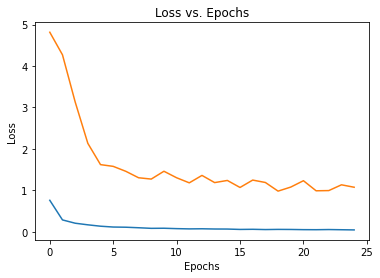

In [ ]:
# Make a plot for the loss

loss_plot = performance.plot(y=['loss', 'val_loss'],title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

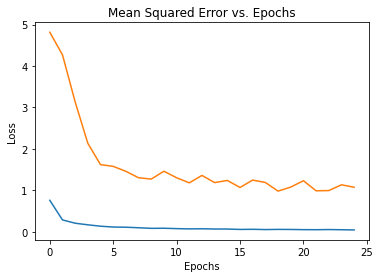

In [ ]:
# Make a plot for the mean squared error

loss_plot = performance.plot(y=['mean_squared_error', 'val_mean_squared_error'],title='Mean Squared Error vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

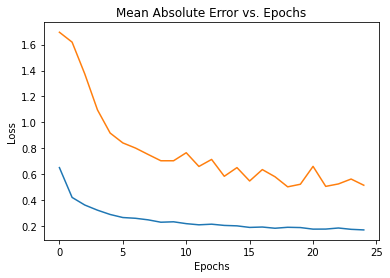

In [ ]:
# Make a plot for the mean absolute error

loss_plot = performance.plot(y=['mean_absolute_error', 'val_mean_absolute_error'], title='Mean Absolute Error vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

In [ ]:
# Getting the testing data needed
# Do not want to shuffle the validation nor testing data

sequential_test_data, sequential_test_X, sequential_test_Y = get_sequences(test_set, False)

In [ ]:
# See how the prediction forms on all the sets

train_predict = model.predict(sequential_training_X)
validation_predict = model.predict(sequential_validation_X)
test_predict = model.predict(sequential_test_X)

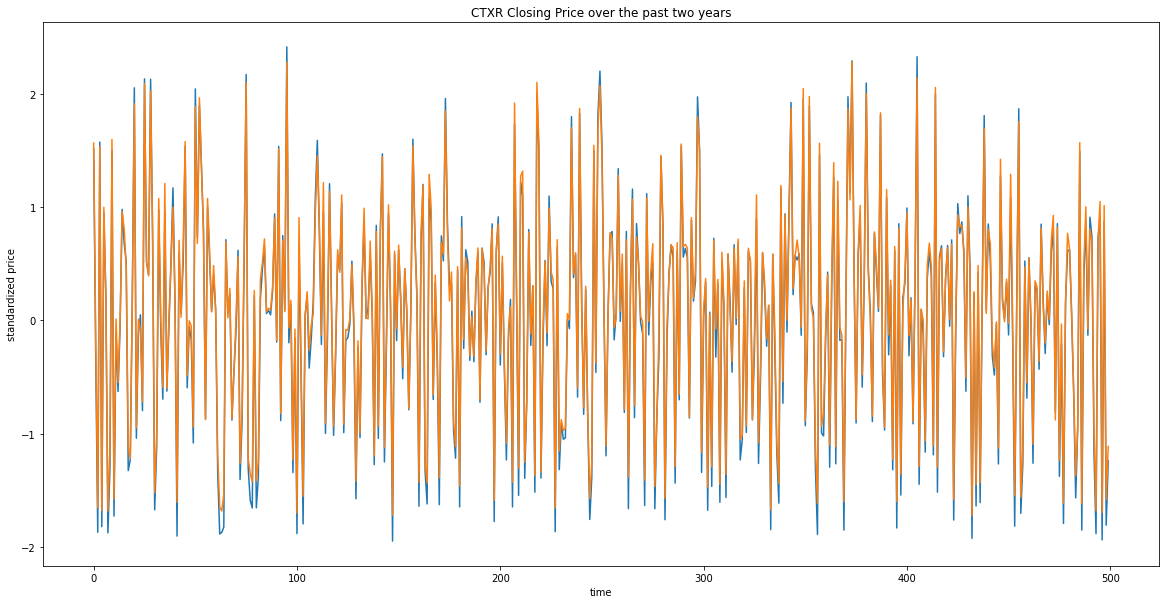

In [ ]:
# The data has been shuffled which is why it does not look like the stock price

plt.figure(figsize=(20,10))
plt.xlabel("time")
plt.ylabel("standardized price")
plt.title("CTXR Closing Price over the past two years")

plt.plot(sequential_training_Y[:500])
plt.plot(train_predict[:500])

plt.show()

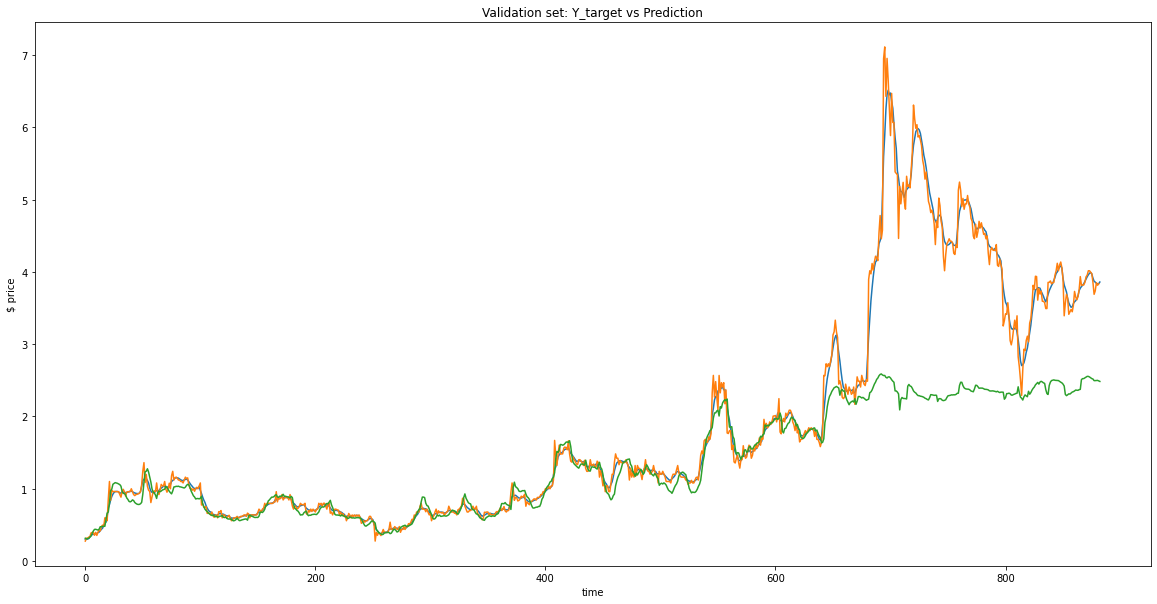

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("time")
plt.ylabel("$ price")
plt.title("Validation set: Y_target vs Prediction")

validation_close = validation_set['close'].iloc[60:]
validation_close.reset_index(inplace=True, drop=True)

plt.plot(sequential_validation_Y)
plt.plot(validation_close)
plt.plot(validation_predict)

plt.show()

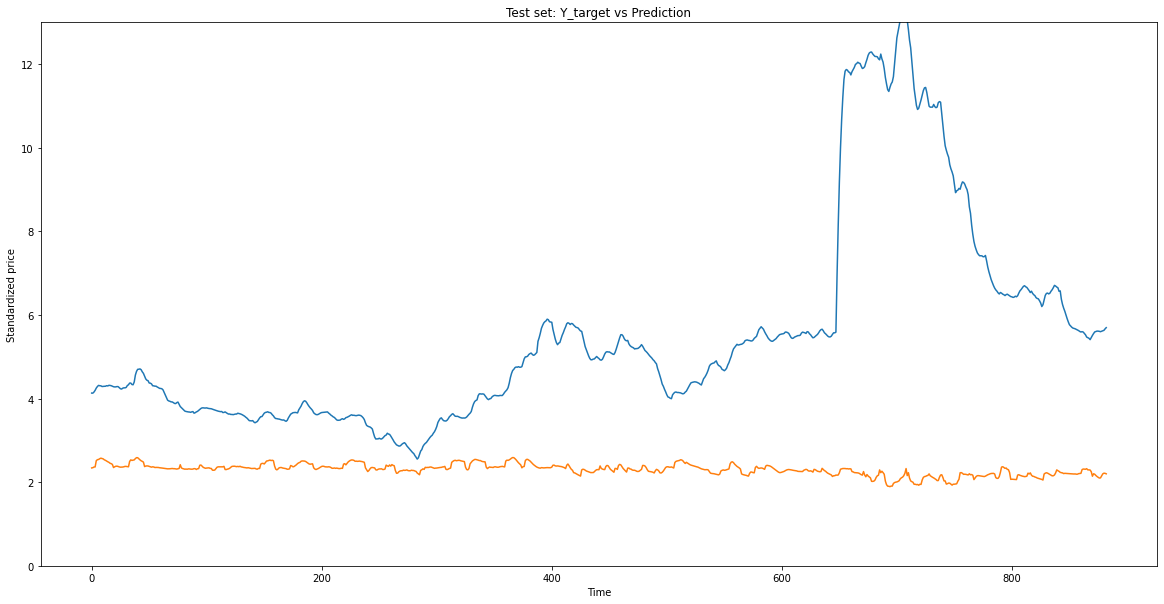

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Time")

plt.ylabel("Standardized price")
plt.title("Test set: Y_target vs Prediction")

plt.plot(sequential_test_Y)
plt.plot(test_predict)

plt.ylim([0, 13])
plt.show()

## Model #2

Will try a different method of scaling all the values. Will instead change everything in the dataframe to percentage change. But first will check how bad the scaling was before.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2577375f10>,
      dtype=object)

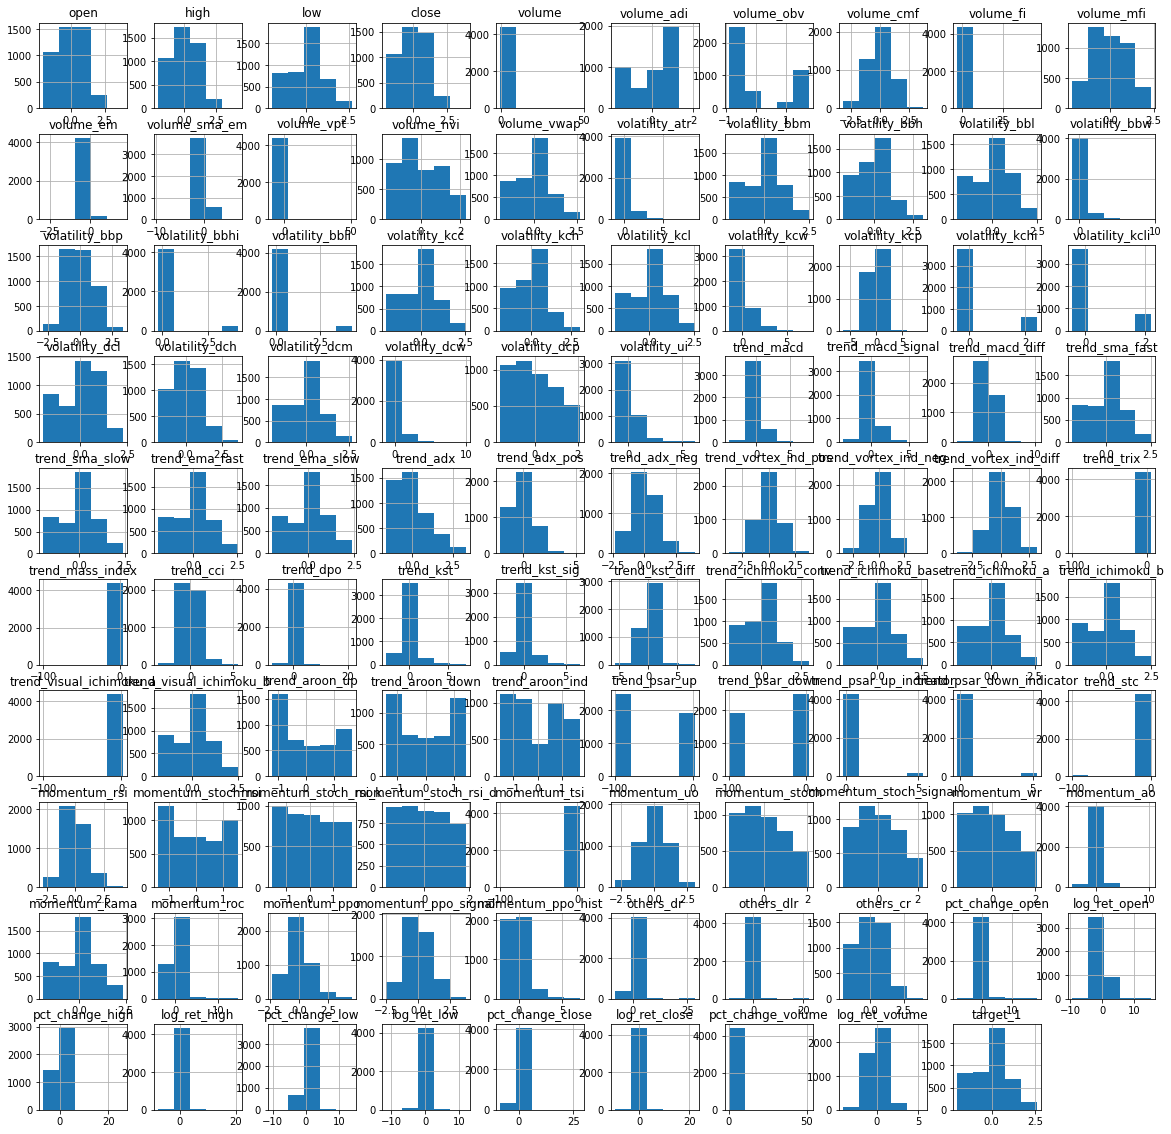

In [ ]:
training_set.hist(figsize=(20,20), bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f257669cdd0>,
      dtype=object)

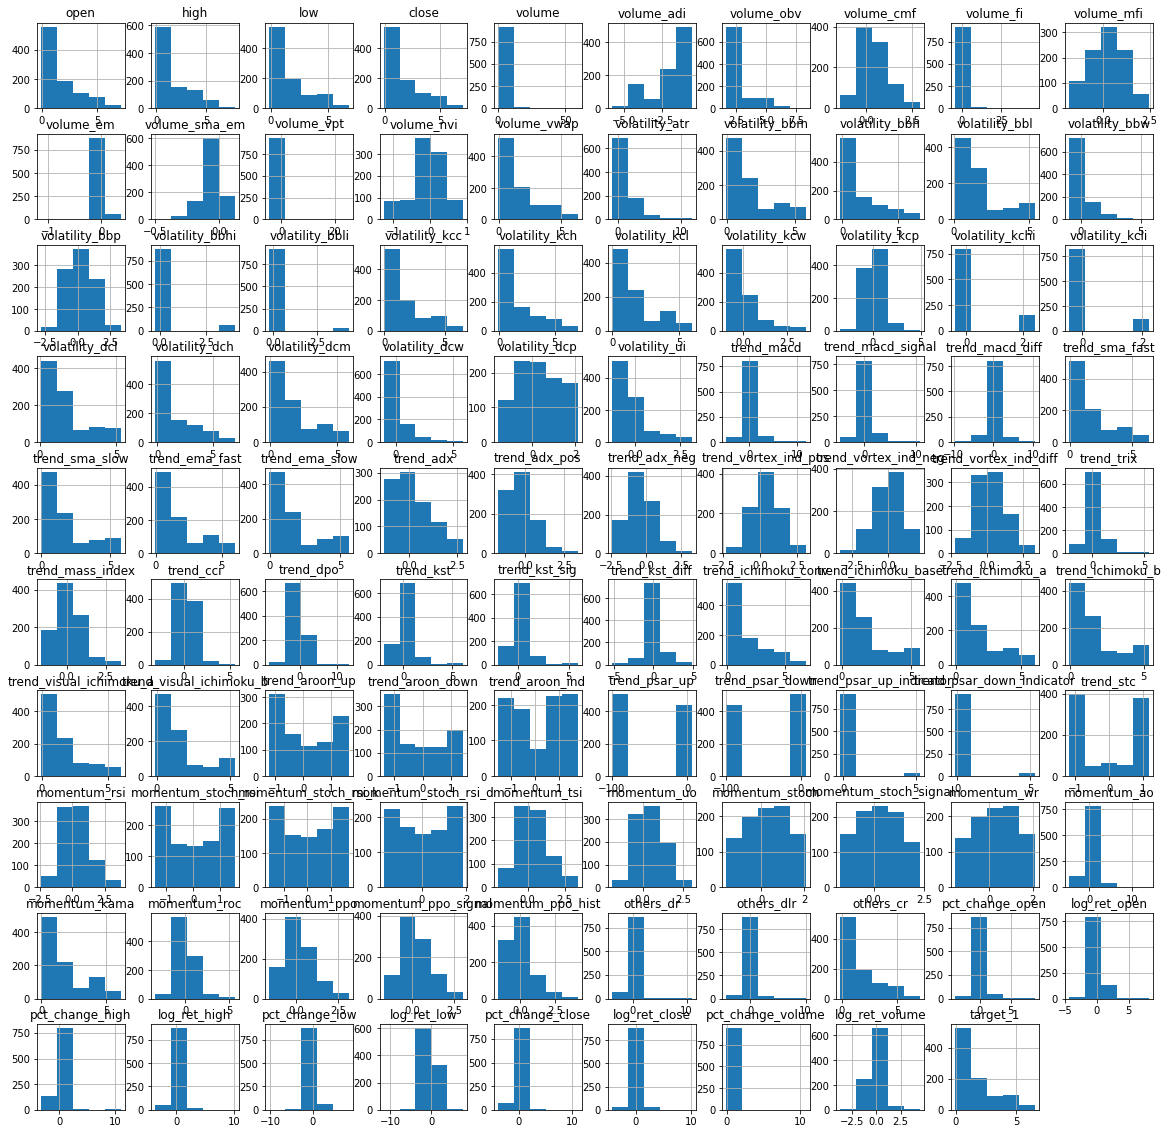

In [ ]:
validation_set.hist(figsize=(20,20), bins=5)

Open, high, low, and close all look very skewed towards the right in the validation set. Will drop the pre-calculated percentage change columns and make the new preprocess function calculate that.

Will also drop the two columns from earlier that had lots of nan values: trend_psar_up and trend_psar_down

In [ ]:
# Drop certain columns

columns_to_drop = ['pct_change_open', 'pct_change_high', 'pct_change_low', 'pct_change_close', 'pct_change_volume',
         'log_ret_open', 'log_ret_high', 'log_ret_low', 'log_ret_close', 'log_ret_volume', 'trend_psar_up', 'trend_psar_down']

new_data = data.drop(columns_to_drop, axis=1)
training_set = data.drop(columns_to_drop, axis=1)
validation_set = data.drop(columns_to_drop, axis=1)
test_set = data.drop(columns_to_drop, axis=1)

In [ ]:
# Keep columns has changed now so do this again

keep_columns = [col for col in new_data.columns if 'target' not in col]
targets = [col for col in new_data.columns if 'target' in col]

In [ ]:
# We define all the sets again because the old ones are already processed

training_set = data[data.index < last_30pct]
validation_set = data[data.index >= last_30pct]
validation_set = validation_set[validation_set.index < last_15pct]
test_set = data[data.index >= last_15pct]

In [ ]:
def preprocess_percent(training_set, validation_set, test_set, target_name: string): # Takes the already split sets as inputs

  training = pd.DataFrame()
  validation = pd.DataFrame()
  test = pd.DataFrame()

  # Calculating the percentage change column for each
  # Drop the first row as there is no percentage change (ie. NaN value in first row)
  training = training_set.pct_change().iloc[1:,:]
  validation = validation_set.pct_change().iloc[1:,:]
  test = test_set.pct_change().iloc[1:,:]

  for col in training_set.columns: # Iterating through training set columns
    
    # Calculating the mean and standard deviation for that column in training set
    mean = training_set[col].mean()
    std = training_set[col].std()

    # Standardizes the value across all sets
    training[col] = (training_set[col] - mean) / std 
    validation[col] = (validation_set[col] - mean) / std 
    test[col] = (test_set[col] - mean) / std 
    
    # Performing min-max normalization
    min = training_set[col].min()
    max = training_set[col].max()
    
    training[col] = (training_set[col] - min) / (max - min) 
    validation[col] = (validation_set[col] - min) / (max - min) 
    test[col] = (test_set[col] - min) / (max - min)
    
  
  # Replace any nan values with the value -100; these values will later be masked
  training.fillna(-1, inplace=True)
  validation.fillna(-1, inplace=True)
  test.fillna(-1, inplace=True)
  
  return pd.concat([training[keep_columns], training[target_name]], axis=1), pd.concat([validation[keep_columns], validation[target_name]], axis=1), pd.concat([test[keep_columns], test[target_name]], axis=1),

In [ ]:
# Can now use the function to obtain the standardized values

training_set_2, validation_set_2, test_set_2 = preprocess_percent(training_set, validation_set, test_set, 'target_1')

In [ ]:
training_set_2.describe()

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,target_1
count,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,...,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000
mean,0.341449,0.329116,0.431480,0.338396,0.003467,0.462223,0.338197,0.462722,0.064214,0.481132,0.584640,0.575950,0.152608,0.432680,0.417505,0.119835,0.440521,0.384090,0.438101,0.095261,0.462039,0.056655,0.050967,0.432457,0.388682,0.436150,0.165395,0.413694,0.146075,0.169511,0.458204,0.349253,0.426322,0.105126,0.430439,0.171161,0.339963,0.348002,0.389696,0.434268,...,0.444672,0.542494,0.307452,0.401758,0.409124,0.269211,0.286406,0.293891,0.418251,0.400709,0.425567,0.424601,0.431909,0.419983,0.432465,0.424564,0.492918,0.465823,0.034130,0.034130,0.491496,0.399734,0.475650,0.475600,0.475586,0.411924,0.493804,0.435380,0.439232,0.435380,0.300677,0.450648,0.221511,0.337900,0.401900,0.227122,0.227449,0.306922,0.338396,0.429843
std,0.169341,0.161546,0.211780,0.168090,0.020778,0.260269,0.378325,0.145378,0.020053,0.218225,0.020296,0.059106,0.016652,0.248371,0.214179,0.096052,0.225739,0.197686,0.225954,0.095187,0.160170,0.231209,0.219955,0.220628,0.197254,0.223077,0.111474,0.065154,0.353222,0.375245,0.234451,0.180128,0.214751,0.089334,0.269861,0.134709,0.084273,0.094483,0.058073,0.222059,...,0.127349,0.141374,0.121234,0.132137,0.105644,0.033940,0.097378,0.104591,0.073545,0.202960,0.219453,0.217046,0.227242,0.232484,0.227346,0.347423,0.355839,0.303064,0.181583,0.181583,0.447267,0.141558,0.340076,0.294853,0.281256,0.147879,0.164582,0.271526,0.246283,0.271526,0.067295,0.231620,0.053489,0.147102,0.159069,0.108942,0.027351,0.031354,0.168090,0.218599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,0.00000

**Can now made the second model**

In [ ]:
# Getting the training data need before training
# Want to shuffle the training data

sequential_training_data, sequential_training_X, sequential_training_Y = get_sequences(training_set_2, True)

In [ ]:
# Define the model

model = Sequential([
                    Masking(mask_value=-100, input_shape=(sequential_training_X.shape[1:])),

                    LSTM(128, input_shape=(sequential_training_X.shape[1:]), return_sequences=True),
                    Dropout(0.2),
                    BatchNormalization(),

                    LSTM(128, input_shape=(sequential_training_X.shape[1:]), return_sequences=True),
                    Dropout(0.2),
                    BatchNormalization(),

                    LSTM(128, input_shape=(sequential_training_X.shape[1:])),
                    Dropout(0.2),
                    BatchNormalization(),

                    Dense(32, activation='relu'),
                    Dropout(0.2),

                    Dense(1)
])

In [ ]:
# Define the Adam optimizer with custom parameters

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

model.compile(loss='mean_squared_error', 
              optimizer=opt, 
              metrics=['MeanSquaredError', 'MeanAbsoluteError'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 60, 86)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 128)           110080    
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 60, 128)           512       
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 128)           131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 60, 128)          

In [ ]:
# Getting the validation data need before training
# Do not want to shuffle the validation nor testing data

sequential_validation_data, sequential_validation_X, sequential_validation_Y = get_sequences(validation_set_2, False)

Before running, must also set up a `ModelCheckpoint` that saves the best model.

In [ ]:
# Creating the filepath for the name that model will be saved as
# Creating the ModelCheckpoint that saves the model with the lowe

filepath = 'LSTM-{epoch:02d}-{val_mean_squared_error:.3f}' # unique file name that will include the epoch and validation accuracy
checkpoint = ModelCheckpoint('models/{}.model'.format(filepath, monitor='val_mean_squared_error', verbose=1, save_best_only=True, mode='min'))

In [ ]:
# Create a dummy feature dimension

padded_x_train = np.expand_dims(sequential_training_X, -1)
padded_x_val = np.expand_dims(sequential_validation_X, -1)

In [ ]:
# Create a masking layer

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
tf_x_val = tf.convert_to_tensor(padded_x_val, dtype='float32')

In [ ]:
# Training the model

history = model.fit(tf_x_train, sequential_training_Y, 
          validation_data=(tf_x_val, sequential_validation_Y),
          epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1,
          callbacks=[checkpoint])

Epoch 1/25
68/68 [==============================] - 43s 482ms/step - loss: 0.5237 - mean_squared_error: 0.5237 - mean_absolute_error: 0.5494 - val_loss: 0.2209 - val_mean_squared_error: 0.2209 - val_mean_absolute_error: 0.3359


INFO:tensorflow:Assets written to: models/LSTM-01-0.221.model/assets


INFO:tensorflow:Assets written to: models/LSTM-01-0.221.model/assets


Epoch 2/25
68/68 [==============================] - 30s 437ms/step - loss: 0.1771 - mean_squared_error: 0.1771 - mean_absolute_error: 0.3296 - val_loss: 0.1593 - val_mean_squared_error: 0.1593 - val_mean_absolute_error: 0.2543


INFO:tensorflow:Assets written to: models/LSTM-02-0.159.model/assets


INFO:tensorflow:Assets written to: models/LSTM-02-0.159.model/assets


Epoch 3/25
68/68 [==============================] - 30s 437ms/step - loss: 0.1032 - mean_squared_error: 0.1032 - mean_absolute_error: 0.2548 - val_loss: 0.1685 - val_mean_squared_error: 0.1685 - val_mean_absolute_error: 0.2848


INFO:tensorflow:Assets written to: models/LSTM-03-0.168.model/assets


INFO:tensorflow:Assets written to: models/LSTM-03-0.168.model/assets


Epoch 4/25
68/68 [==============================] - 30s 437ms/step - loss: 0.0769 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2166 - val_loss: 0.1181 - val_mean_squared_error: 0.1181 - val_mean_absolute_error: 0.2312


INFO:tensorflow:Assets written to: models/LSTM-04-0.118.model/assets


INFO:tensorflow:Assets written to: models/LSTM-04-0.118.model/assets


Epoch 5/25
68/68 [==============================] - 30s 439ms/step - loss: 0.0578 - mean_squared_error: 0.0578 - mean_absolute_error: 0.1895 - val_loss: 0.0530 - val_mean_squared_error: 0.0530 - val_mean_absolute_error: 0.1468


INFO:tensorflow:Assets written to: models/LSTM-05-0.053.model/assets


INFO:tensorflow:Assets written to: models/LSTM-05-0.053.model/assets


Epoch 6/25
68/68 [==============================] - 30s 438ms/step - loss: 0.0443 - mean_squared_error: 0.0443 - mean_absolute_error: 0.1658 - val_loss: 0.0421 - val_mean_squared_error: 0.0421 - val_mean_absolute_error: 0.1176


INFO:tensorflow:Assets written to: models/LSTM-06-0.042.model/assets


INFO:tensorflow:Assets written to: models/LSTM-06-0.042.model/assets


Epoch 7/25
68/68 [==============================] - 30s 437ms/step - loss: 0.0321 - mean_squared_error: 0.0321 - mean_absolute_error: 0.1400 - val_loss: 0.0530 - val_mean_squared_error: 0.0530 - val_mean_absolute_error: 0.1331


INFO:tensorflow:Assets written to: models/LSTM-07-0.053.model/assets


INFO:tensorflow:Assets written to: models/LSTM-07-0.053.model/assets


Epoch 8/25
68/68 [==============================] - 30s 439ms/step - loss: 0.0262 - mean_squared_error: 0.0262 - mean_absolute_error: 0.1253 - val_loss: 0.0306 - val_mean_squared_error: 0.0306 - val_mean_absolute_error: 0.1208


INFO:tensorflow:Assets written to: models/LSTM-08-0.031.model/assets


INFO:tensorflow:Assets written to: models/LSTM-08-0.031.model/assets


Epoch 9/25
68/68 [==============================] - 30s 439ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - mean_absolute_error: 0.1141 - val_loss: 0.0318 - val_mean_squared_error: 0.0318 - val_mean_absolute_error: 0.1056


INFO:tensorflow:Assets written to: models/LSTM-09-0.032.model/assets


INFO:tensorflow:Assets written to: models/LSTM-09-0.032.model/assets


Epoch 10/25
68/68 [==============================] - 30s 438ms/step - loss: 0.0189 - mean_squared_error: 0.0189 - mean_absolute_error: 0.1063 - val_loss: 0.0517 - val_mean_squared_error: 0.0517 - val_mean_absolute_error: 0.1435


INFO:tensorflow:Assets written to: models/LSTM-10-0.052.model/assets


INFO:tensorflow:Assets written to: models/LSTM-10-0.052.model/assets


Epoch 11/25
68/68 [==============================] - 30s 440ms/step - loss: 0.0150 - mean_squared_error: 0.0150 - mean_absolute_error: 0.0950 - val_loss: 0.0346 - val_mean_squared_error: 0.0346 - val_mean_absolute_error: 0.1178


INFO:tensorflow:Assets written to: models/LSTM-11-0.035.model/assets


INFO:tensorflow:Assets written to: models/LSTM-11-0.035.model/assets


Epoch 12/25
68/68 [==============================] - 30s 440ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - mean_absolute_error: 0.0897 - val_loss: 0.0301 - val_mean_squared_error: 0.0301 - val_mean_absolute_error: 0.0948


INFO:tensorflow:Assets written to: models/LSTM-12-0.030.model/assets


INFO:tensorflow:Assets written to: models/LSTM-12-0.030.model/assets


Epoch 13/25
68/68 [==============================] - 30s 438ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - mean_absolute_error: 0.0838 - val_loss: 0.0409 - val_mean_squared_error: 0.0409 - val_mean_absolute_error: 0.1085


INFO:tensorflow:Assets written to: models/LSTM-13-0.041.model/assets


INFO:tensorflow:Assets written to: models/LSTM-13-0.041.model/assets


Epoch 14/25
68/68 [==============================] - 30s 436ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - mean_absolute_error: 0.0824 - val_loss: 0.0463 - val_mean_squared_error: 0.0463 - val_mean_absolute_error: 0.1190


INFO:tensorflow:Assets written to: models/LSTM-14-0.046.model/assets


INFO:tensorflow:Assets written to: models/LSTM-14-0.046.model/assets


Epoch 15/25
68/68 [==============================] - 30s 437ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - mean_absolute_error: 0.0771 - val_loss: 0.0476 - val_mean_squared_error: 0.0476 - val_mean_absolute_error: 0.1363


INFO:tensorflow:Assets written to: models/LSTM-15-0.048.model/assets


INFO:tensorflow:Assets written to: models/LSTM-15-0.048.model/assets


Epoch 16/25
68/68 [==============================] - 30s 440ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - mean_absolute_error: 0.0724 - val_loss: 0.0364 - val_mean_squared_error: 0.0364 - val_mean_absolute_error: 0.1098


INFO:tensorflow:Assets written to: models/LSTM-16-0.036.model/assets


INFO:tensorflow:Assets written to: models/LSTM-16-0.036.model/assets


Epoch 17/25
68/68 [==============================] - 30s 439ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - mean_absolute_error: 0.0726 - val_loss: 0.0409 - val_mean_squared_error: 0.0409 - val_mean_absolute_error: 0.1279


INFO:tensorflow:Assets written to: models/LSTM-17-0.041.model/assets


INFO:tensorflow:Assets written to: models/LSTM-17-0.041.model/assets


Epoch 18/25
68/68 [==============================] - 30s 437ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0682 - val_loss: 0.0542 - val_mean_squared_error: 0.0542 - val_mean_absolute_error: 0.1688


INFO:tensorflow:Assets written to: models/LSTM-18-0.054.model/assets


INFO:tensorflow:Assets written to: models/LSTM-18-0.054.model/assets


Epoch 19/25
68/68 [==============================] - 30s 438ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0673 - val_loss: 0.0432 - val_mean_squared_error: 0.0432 - val_mean_absolute_error: 0.1273


INFO:tensorflow:Assets written to: models/LSTM-19-0.043.model/assets


INFO:tensorflow:Assets written to: models/LSTM-19-0.043.model/assets


Epoch 20/25
68/68 [==============================] - 30s 438ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0664 - val_loss: 0.0341 - val_mean_squared_error: 0.0341 - val_mean_absolute_error: 0.1014


INFO:tensorflow:Assets written to: models/LSTM-20-0.034.model/assets


INFO:tensorflow:Assets written to: models/LSTM-20-0.034.model/assets


Epoch 21/25
68/68 [==============================] - 30s 439ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - mean_absolute_error: 0.0620 - val_loss: 0.0260 - val_mean_squared_error: 0.0260 - val_mean_absolute_error: 0.0962


INFO:tensorflow:Assets written to: models/LSTM-21-0.026.model/assets


INFO:tensorflow:Assets written to: models/LSTM-21-0.026.model/assets


Epoch 22/25
68/68 [==============================] - 30s 441ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - mean_absolute_error: 0.0606 - val_loss: 0.0343 - val_mean_squared_error: 0.0343 - val_mean_absolute_error: 0.0985


INFO:tensorflow:Assets written to: models/LSTM-22-0.034.model/assets


INFO:tensorflow:Assets written to: models/LSTM-22-0.034.model/assets


Epoch 23/25
68/68 [==============================] - 30s 439ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - mean_absolute_error: 0.0576 - val_loss: 0.0428 - val_mean_squared_error: 0.0428 - val_mean_absolute_error: 0.1070


INFO:tensorflow:Assets written to: models/LSTM-23-0.043.model/assets


INFO:tensorflow:Assets written to: models/LSTM-23-0.043.model/assets


Epoch 24/25
68/68 [==============================] - 30s 438ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - mean_absolute_error: 0.0580 - val_loss: 0.0361 - val_mean_squared_error: 0.0361 - val_mean_absolute_error: 0.1123


INFO:tensorflow:Assets written to: models/LSTM-24-0.036.model/assets


INFO:tensorflow:Assets written to: models/LSTM-24-0.036.model/assets


Epoch 25/25
68/68 [==============================] - 30s 436ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - mean_absolute_error: 0.0574 - val_loss: 0.0422 - val_mean_squared_error: 0.0422 - val_mean_absolute_error: 0.1071


INFO:tensorflow:Assets written to: models/LSTM-25-0.042.model/assets


INFO:tensorflow:Assets written to: models/LSTM-25-0.042.model/assets


**Learning curves**

In [ ]:
# Load the history into a pandas Dataframe

performance = pd.DataFrame(history.history)
performance.head(-5)

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error
0,0.523690,0.523690,0.549405,0.220923,0.220923,0.335851
1,0.177072,0.177072,0.329618,0.159304,0.159304,0.254300
2,0.103230,0.103230,0.254834,0.168456,0.168456,0.284845
3,0.076873,0.076873,0.216616,0.118099,0.118099,0.231195
4,0.057778,0.057778,0.189488,0.053026,0.053026,0.146753
5,0.044256,0.044256,0.165792,0.042115,0.042115,0.117635
6,0.032072,0.032072,0.140044,0.053047,0.053047,0.133111
7,0.026180,0.026180,0.125326,0.030637,0.030637,0.120790
8,0.021360,0.021360,0.114148,0.031775,0.031775,0.105628
9,0.018894,0.018894,0.106289,0.051705,0.051705,0.143494


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

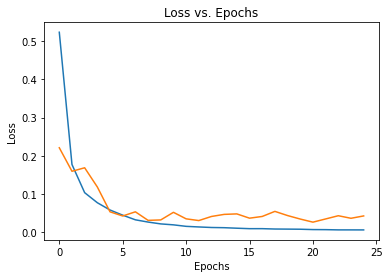

In [ ]:
# Make a plot for the loss

loss_plot = performance.plot(y=['loss', 'val_loss'],title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

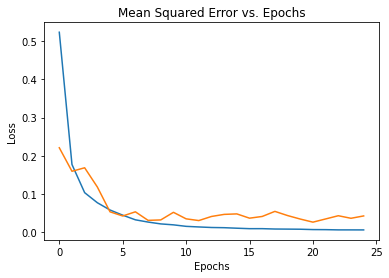

In [ ]:
# Make a plot for the mean squared error

loss_plot = performance.plot(y=['mean_squared_error', 'val_mean_squared_error'],title='Mean Squared Error vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

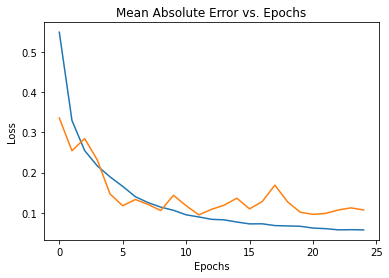

In [ ]:
# Make a plot for the mean absolute error

loss_plot = performance.plot(y=['mean_absolute_error', 'val_mean_absolute_error'], title='Mean Absolute Error vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

In [ ]:
# Getting the testing data needed
# Do not want to shuffle the validation nor testing data

sequential_test_data, sequential_test_X, sequential_test_Y = get_sequences(test_set_2, False)

# USE TEST_SET ???? I THINK MUST CHANGE


FIX ABOVE. CHECK BELOW.

In [ ]:
# Getting the test data needed before testing
# Do not want to shuffle the testing data

sequential_test_data, sequential_test_X, sequential_test_Y = get_sequences(test_set_2, False)

In [ ]:
# See how the prediction forms on all the sets

train_predict = model.predict(sequential_training_X)
validation_predict = model.predict(sequential_validation_X)
test_predict = model.predict(sequential_test_X)

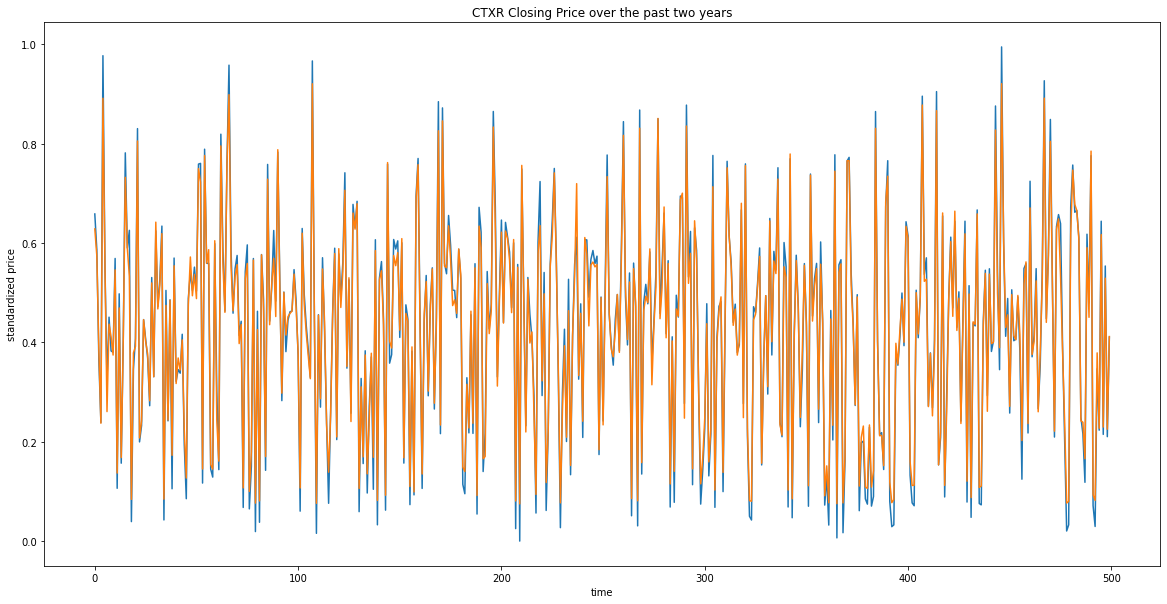

In [ ]:
# The data has been shuffled which is why it does not look like the stock price

plt.figure(figsize=(20,10))
plt.xlabel("time")
plt.ylabel("standardized price")
plt.title("CTXR Closing Price over the past two years")

plt.plot(sequential_training_Y[:500])
plt.plot(train_predict[:500])

plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("time")
plt.ylabel("$ price")
plt.title("Validation set: Y_target vs Prediction")

validation_close = validation_set['close'].iloc[60:]
validation_close.reset_index(inplace=True, drop=True)

plt.plot(sequential_validation_Y)
plt.plot(validation_close)
plt.plot(validation_predict)

plt.show()

NameError: ignored

Clearly model 2 is much better.